# Exploratory Data Analysis
***
>## 1.  Data exploration
>>### a. [Importing necessary libraries/modules](#1_a)
>>### b. [Reading data file from source and getting some superficial information](#1_b)
>## 2. [Data cleaning](#Data-cleaning)
>## 3. [Model building](#Model-building)
>## 4. [Presenting results](#Presenting-results) 

<img src="data-analysis-for-ML_how-we-use-dataAnalysis.png">

<a id='1_a'></a>

### 1. a. Importing necessary libraries/modules

In [3]:
import pandas as pd
import numpy as np
#import xgboost as xgb
import json
import re
from sklearn.model_selection import train_test_split
from matplotlib import cm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
#%matplotlib notebook
# to see all of the columns
from IPython.display import display
from IPython.display import Image
from collections import Counter
pd.options.display.max_columns = None
plt.style.use('bmh')

<a id='1_b'></a>

### 1. b. Reading data file from source and getting some superficial information

In [12]:
df = pd.read_csv('scout_clean_3models.csv')

In [18]:
v_cols = ['comfort_convenience', 'extras', 'drive_chain',
         'electricity_consumption', 'emission_class', 'emission_label',
         'first_registration', 'fuel', 'nr_of_doors', 'nr_of_seats',
         'other_fuel_types', 'previous_owners', 'type', 'upholstery', 'warranty',
         'weight', 'prev_owner', 'url']

In [13]:
df.head(3)

co2_emission country_version  cylinders  displacement  make model  \
0          99.0             NaN        3.0        1422.0  Audi    A1   
1         129.0             NaN        4.0        1798.0  Audi    A1   
2          99.0             NaN        NaN        1598.0  Audi    A1   

  model_code next_inspection body_type  \
0   0588/BDF         06/2021    Sedans   
1   0588/BCY             NaN    Sedans   
2        NaN             NaN    Sedans   

                                         description     hp       km  \
0  Sicherheit: Deaktivierung für Beifahrer-Airbag...   66.0  56013.0   
1  Sicherheit: Deaktivierung für Beifahrer-Airbag...  141.0  80000.0   
2  Sicherheit: Deaktivierung für Beifahrer-Airbag...   85.0  83450.0   

  offer_number  ss_abs  ss_adaptive_cruise_control  ss_adaptive_headlights  \
0    LR-062483       1                           0                       0   
1          NaN       1                           0                       0   
2     AM-95365       1                           0                       0   

   ss_alarm_system  ss_blind_spot_monitor  ss_central_door_lock  \
0                0                      0                     1   
1                0                      0                     1   
2                0                      0                     1   

   ss_central_door_lock_with_remote_control  ss_daytime_running_lights  \
0                                         0                          1   
1                                         1                          1   
2                                         0                          1   

   ss_driver_drowsiness_detection  ss_driver_side_airbag  \
0                               0                      1   
1                               0                      1   
2                               0                      1   

   ss_electronic_stability_control  ss_emergency_brake_assistant  \
0                                1                             0   
1                                1                             0   
2                                1                             0   

   ss_emergency_system  ss_fog_lights  ss_head_airbag  ss_immobilizer  \
0                    0              1               0               1   
1                    0              0               1               1   
2                    0              0               0               1   

   ss_isofix  ss_led_daytime_running_lights  ss_led_headlights  \
0          1                              0                  0   
1          1                              0                  0   
2          1                              0                  0   

   ss_lane_departure_warning_system  ss_night_view_assist  \
0                                 0                     0   
1                                 0                     0   
2                                 0                     0   

   ss_passenger_side_airbag  ss_power_steering  ss_rear_airbag  \
0                         1                  1               0   
1                         1                  1               0   
2                         1                  1               0   

   ss_side_airbag  ss_tire_pressure_monitoring_system  ss_traction_control  \
0               1                                   1                    1   
1               1                                   1                    1   
2               1                                   1                    1   

   ss_traffic_sign_recognition  ss_xenon_headlights  next_inspection_bool  \
0                            0                    1                  True   
1                            0                    1                 False   
2                            0                    0                 False   

   consumption_comb available_from    body body_color gearing_type  gears  \
0               3.8            NaN  Sedans      Black    Automatic    NaN   
1               5.6

In [19]:
df_v = df[v_cols]
df_v.head(3)

KeyError: "['comfort_convenience', 'other_fuel_types', 'extras', 'electricity_consumption', 'weight'] not in index"

In [14]:
df_n = df.copy()

In [15]:
df_n = df_n.dropna()

In [17]:
df_n.head()

Empty DataFrame
Columns: [co2_emission, country_version, cylinders, displacement, make, model, model_code, next_inspection, body_type, description, hp, km, offer_number, ss_abs, ss_adaptive_cruise_control, ss_adaptive_headlights, ss_alarm_system, ss_blind_spot_monitor, ss_central_door_lock, ss_central_door_lock_with_remote_control, ss_daytime_running_lights, ss_driver_drowsiness_detection, ss_driver_side_airbag, ss_electronic_stability_control, ss_emergency_brake_assistant, ss_emergency_system, ss_fog_lights, ss_head_airbag, ss_immobilizer, ss_isofix, ss_led_daytime_running_lights, ss_led_headlights, ss_lane_departure_warning_system, ss_night_view_assist, ss_passenger_side_airbag, ss_power_steering, ss_rear_airbag, ss_side_airbag, ss_tire_pressure_monitoring_system, ss_traction_control, ss_traffic_sign_recognition, ss_xenon_headlights, next_inspection_bool, consumption_comb, available_from, body, body_color, gearing_type, gears, inspection_new, last_service_date, paint_type, price, vat, age, entertainment_media_bluetooth, entertainment_media_cd_player, entertainment_media_digital_radio, entertainment_media_hands_free_equipment, entertainment_media_mp3, entertainment_media_on_board_computer, entertainment_media_radio, entertainment_media_sound_system, entertainment_media_television, entertainment_media_usb, available_after_days, drive_chain, emission_class, emission_label, first_registration, fuel, nr_of_doors, nr_of_seats, previous_owners, type, upholstery, warranty, prev_owner, url, cc_air_conditioning, cc_air_suspension, cc_armrest, cc_automatic_climate_control, cc_auxiliary_heating, cc_cruise_control, cc_electric_starter, cc_electric_tailgate, cc_electrical_side_mirrors, cc_electrically_adjustable_seats, cc_electrically_heated_windshield, cc_heads_up_display, cc_heated_steering_wheel, cc_hill_holder, cc_keyless_central_door_lock, cc_leather_seats, cc_leather_steering_wheel, cc_light_sensor, cc_lumbar_support, cc_massage_seats, cc_multi_function_steering_wheel, ...]
Index: []

In [35]:
len(df.columns)

135

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Columns: 135 entries, co2_emission to weight_kg
dtypes: bool(1), float64(15), int64(97), object(22)
memory usage: 16.3+ MB


In [54]:
col_names = df.columns

In [75]:
# since we can't see the column data types with df.info() we can see all column dtypes as follows.
for name in col_names:
    print("Column Name: ", name.ljust(45), ":", str(df[name].dtype).ljust(10), " ,",
          "non-null : ", df[name].notnull().sum())

Column Name:  co2_emission                                  : float64     , non-null :  13483
Column Name:  country_version                               : object      , non-null :  7586
Column Name:  cylinders                                     : float64     , non-null :  10239
Column Name:  displacement                                  : float64     , non-null :  15423
Column Name:  make                                          : object      , non-null :  15919
Column Name:  model                                         : object      , non-null :  15919
Column Name:  model_code                                    : object      , non-null :  4978
Column Name:  next_inspection                               : object      , non-null :  2825
Column Name:  body_type                                     : object      , non-null :  15859
Column Name:  description                                   : object      , non-null :  15919
Column Name:  hp                                            : f

Column Name:  cc_electrically_heated_windshield             : int64       , non-null :  15919
Column Name:  cc_heads_up_display                           : int64       , non-null :  15919
Column Name:  cc_heated_steering_wheel                      : int64       , non-null :  15919
Column Name:  cc_hill_holder                                : int64       , non-null :  15919
Column Name:  cc_keyless_central_door_lock                  : int64       , non-null :  15919
Column Name:  cc_leather_seats                              : int64       , non-null :  15919
Column Name:  cc_leather_steering_wheel                     : int64       , non-null :  15919
Column Name:  cc_light_sensor                               : int64       , non-null :  15919
Column Name:  cc_lumbar_support                             : int64       , non-null :  15919
Column Name:  cc_massage_seats                              : int64       , non-null :  15919
Column Name:  cc_multi_function_steering_wheel              

In [84]:
Dtypes = Counter(df.dtypes)
Dtypes

Counter({dtype('float64'): 15,
         dtype('O'): 22,
         dtype('int64'): 97,
         dtype('bool'): 1})

In [9]:
df.describe()

co2_emission     cylinders  displacement            hp             km  \
count  13483.000000  10239.000000  15423.000000  15831.000000   14895.000000   
mean     117.953942      3.797343   1423.540881     88.367696   34130.127828   
std       20.245589      0.415382    333.530658     26.835135   37352.977568   
min        0.000000      1.000000      1.000000      1.000000       0.000000   
25%      104.000000      4.000000   1229.000000     66.000000    5153.000000   
50%      116.000000      4.000000   1461.000000     85.000000   22740.000000   
75%      129.000000      4.000000   1598.000000    101.000000   49371.500000   
max      990.000000      8.000000  16000.000000    294.000000  317000.000000   

             ss_abs  ss_adaptive_cruise_control  ss_adaptive_headlights  \
count  15919.000000                15919.000000            15919.000000   
mean       0.887619                    0.081852                0.128212   
std        0.315845                    0.274148                0.334336   
min        0.000000                    0.000000                0.000000   
25%        1.000000                    0.000000                0.000000   
50%        1.000000                    0.000000                0.000000   
75%        1.000000                    0.000000                0.000000   
max        1.000000                    1.000000                1.000000   

       ss_alarm_system  ss_blind_spot_monitor  ss_central_door_lock  \
count     15919.000000           15919.000000          15919.000000   
mean          0.120736               0.081098              0.798229   
std           0.325831               0.272994              0.401335   
min           0.000000               0.000000              0.000000   
25%           0.000000               0.000000              1.000000   
50%           0.000000               0.000000              1.000000   
75%           0.000000               0.000000              1.000000   
max           1.000000               1.000000              1.000000   

       ss_central_door_lock_with_remote_control  ss_daytime_running_lights  \
count                              15919.000000               15919.000000   
mean                                   0.150575                   0.654061   
std                                    0.357645                   0.475688   
min                                    0.000000                   0.000000   
25%                                    0.000000                   0.000000   
50%                                    0.000000                   1.000000   
75%                                    0.000000                   1.000000   
max                                    1.000000                   1.000000   

       ss_driver_drowsiness_detection  ss_driver_side_airbag  \
count                    15919.000000           15919.000000   
mean                         0.031786               0.873296   
std                          0.175435               0.332651   
min                          0.000000               0.000000   
25%                          0.000000               1.000000   
50%                          0.000000               1.000000   
75%                          0.000000               1.000000   
max                          1.000000               1.000000   

       ss_electronic_stability_control  ss_emergency_brake_assistant  \
count                     15919.000000                  15919.000000   
mean                          0.828381                      0.197940   
std                           0.377061                      0.398459   
min                           0.000000                      0.000000   
25%                           1.000000                      0.000000   
50%                           1.000000                      0.000000   
75%                           1.000000                      0.000000   
max                           1.000000                      1.000000   

       ss_emergency_system  ss_fog_lights

There are 97 int columns and most of them consist of 1's and 0's. So to make it easy we can investigate only "float"s.

<a id="float_describe"></a>

In [7]:
df_float = df.select_dtypes(include = 'float64')
df_float["price"] = df["price"]
df_float.describe()

C:\Users\buono\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


co2_emission     cylinders  displacement            hp             km  \
count  13483.000000  10239.000000  15423.000000  15831.000000   14895.000000   
mean     117.953942      3.797343   1423.540881     88.367696   34130.127828   
std       20.245589      0.415382    333.530658     26.835135   37352.977568   
min        0.000000      1.000000      1.000000      1.000000       0.000000   
25%      104.000000      4.000000   1229.000000     66.000000    5153.000000   
50%      116.000000      4.000000   1461.000000     85.000000   22740.000000   
75%      129.000000      4.000000   1598.000000    101.000000   49371.500000   
max      990.000000      8.000000  16000.000000    294.000000  317000.000000   

       consumption_comb         gears           age  available_after_days  \
count      13036.000000  11207.000000  14322.000000            635.000000   
mean           4.784527      5.924601      1.542382             76.725984   
std            0.919294      0.848158      1.076917             52.204680   
min            0.000000      1.000000      0.000000              1.000000   
25%            4.000000      5.000000      1.000000              7.000000   
50%            4.700000      6.000000      1.000000             90.000000   
75%            5.400000      6.000000      3.000000            120.000000   
max            9.100000     50.000000      3.000000            180.000000   

       first_registration   nr_of_doors   nr_of_seats  previous_owners  \
count        14322.000000  15707.000000  14942.000000      9279.000000   
mean          2017.457618      4.656077      4.949873         1.067895   
std              1.076917      0.645298      0.489872         0.329812   
min           2016.000000      1.000000      2.000000         0.000000   
25%           2016.000000      4.000000      5.000000         1.000000   
50%           2018.000000      5.000000      5.000000         1.000000   
75%           2018.000000      5.000000      5.000000         1.000000   
max           2019.000000      7.000000      7.000000         4.000000   

        prev_owner    weight_kg         price  
count  9091.000000  8945.000000  15919.000000  
mean      1.089979  1351.106540  18019.896727  
std       0.294877   220.661532   7386.169409  
min       1.000000     1.000000     13.000000  
25%       1.000000  1165.000000  12850.000000  
50%       1.000000  1288.000000  16900.000000  
75%       1.000000  1487.000000  21900.000000  
max       4.000000  2471.000000  74600.000000

[Go Back](#go)

In [8]:
df_float.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 16 columns):
co2_emission            13483 non-null float64
cylinders               10239 non-null float64
displacement            15423 non-null float64
hp                      15831 non-null float64
km                      14895 non-null float64
consumption_comb        13036 non-null float64
gears                   11207 non-null float64
age                     14322 non-null float64
available_after_days    635 non-null float64
first_registration      14322 non-null float64
nr_of_doors             15707 non-null float64
nr_of_seats             14942 non-null float64
previous_owners         9279 non-null float64
prev_owner              9091 non-null float64
weight_kg               8945 non-null float64
price                   15919 non-null int64
dtypes: float64(15), int64(1)
memory usage: 1.9 MB


"available_after_days" column has too much NaN values and seems not to have any correlation with price. It is better to drop this column from df.

In [9]:
del df["available_after_days"]
del df_float["available_after_days"]

In [10]:
# At first it is better to see the correlation between columns.
corr = df_float.corr()

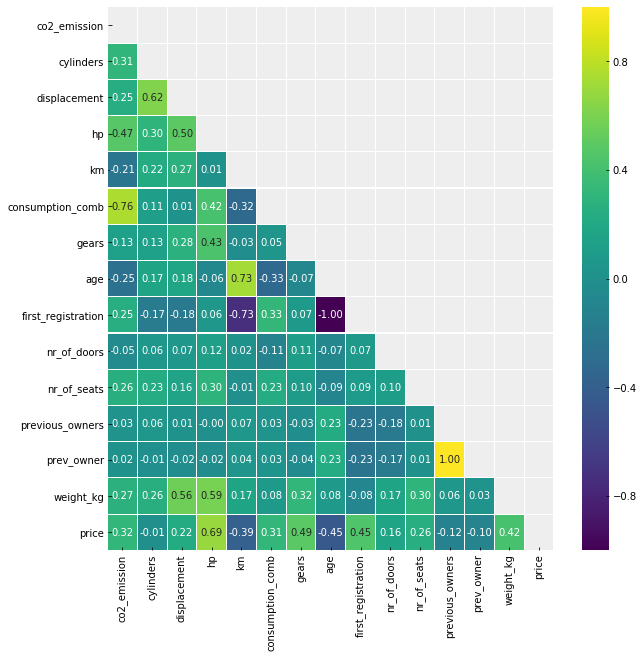

In [11]:
# to make the figure a bit bigger
plt.figure(figsize=(10, 10))
# Generating a mask for the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))
# Add the mask to the heatmap and see the corr matrix as a heatmap
sns.heatmap(corr, mask=mask, cmap=cm.viridis, center=0, linewidths=0.1, annot=True, fmt=".2f")
plt.show()

From the heatmap we see some colums are highly correlated. (-1 and 1) It is very clear that "prev_owner" and "previous_owner" columns and "first_registraion" and "age" columns are correlated. We can drop one of these columns.

In [12]:
del df["previous_owners"], df["first_registration"]
del df_float["previous_owners"], df_float["first_registration"]

In 2009, the EU set legally-binding targets for new cars to emit 130 grammes of CO2 per km by 2015 and 95g in 2021. This means that it is important only if C02 emission is below 130 g/km or not!. We can treat this column as categorical and rearrange the rows as 1's(under 130) and 0's(over 130).

In [13]:
co2 = df_float["co2_emission"]
co2 = [1 if row <= 130 else 0 for row in co2 ]
df_float["co2"] = co2

C:\Users\buono\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
# we can drop the "co2_emissioon"
del df_float["co2_emission"]
df_float.head(2)

cylinders  displacement     hp       km  consumption_comb  gears  age  \
0        3.0        1422.0   66.0  56013.0               3.8    NaN  3.0   
1        4.0        1798.0  141.0  80000.0               5.6    7.0  2.0   

   nr_of_doors  nr_of_seats  prev_owner  weight_kg  price  co2  
0          5.0          5.0         2.0     1220.0  15770    1  
1          3.0          4.0         NaN     1255.0  14500    1

In [15]:
one_cylinder = df[df["cylinders"] == 1]
one_cylinder

co2_emission country_version  cylinders  displacement  make  model  \
9956         140.0         Germany        1.0        1398.0  Opel  Corsa   

     model_code next_inspection body_type  \
9956        NaN         04/2022   Compact   

                                            description    hp     km  \
9956  Sicherheit: Deaktivierung für Beifahrer-Airbag...  66.0  100.0   

     offer_number  ss_abs  ss_adaptive_cruise_control  ss_adaptive_headlights  \
9956   08K6068289       1                           0                       0   

      ss_alarm_system  ss_blind_spot_monitor  ss_central_door_lock  \
9956                0                      0                     1   

      ss_central_door_lock_with_remote_control  ss_daytime_running_lights  \
9956                                         0                          1   

      ss_driver_drowsiness_detection  ss_driver_side_airbag  \
9956                               0                      1   

      ss_electronic_stability_control  ss_emergency_brake_assistant  \
9956                                1                             0   

      ss_emergency_system  ss_fog_lights  ss_head_airbag  ss_immobilizer  \
9956                    0              1               0               1   

      ss_isofix  ss_led_daytime_running_lights  ss_led_headlights  \
9956          1                              0                  0   

      ss_lane_departure_warning_system  ss_night_view_assist  \
9956                                 0                     0   

      ss_passenger_side_airbag  ss_power_steering  ss_rear_airbag  \
9956                         1                  1               0   

      ss_side_airbag  ss_tire_pressure_monitoring_system  ss_traction_control  \
9956               1                                   1                    1   

      ss_traffic_sign_recognition  ss_xenon_headlights  next_inspection_bool  \
9956                            0                    0                  True   

      consumption_comb available_from     body body_color gearing_type  gears  \
9956               6.0            NaN  Compact      Black    Automatic    6.0   

      inspection_new last_service_date paint_type  price             vat  age  \
9956               0               NaN   Metallic  16625  VAT deductible  0.0   

      entertainment_media_bluetooth  entertainment_media_cd_player  \
9956                              1                              0   

      entertainment_media_digital_radio  \
9956                                  1   

      entertainment_media_hands_free_equipment  entertainment_media_mp3  \
9956                                         1                        1   

      entertainment_media_on_board_computer  entertainment_media_radio  \
9956                                      1                          1   

      entertainment_media_sound_system  entertainment_media_television  \
9956                                 0                               0   

      entertainment_media_usb drive_chain emission_class emission_label  \
9956                        0       front   Euro 6d-TEMP            NaN   

          fuel  nr_of_doors  nr_of_seats            type    upholstery  \
9956  Super 95          3.0          5.0  Pre-registered  Cloth, Black   

      warranty  prev_owner                                                url  \
9956         1         1.0  https://www.autoscout24.com//offers/opel-corsa...   

      cc_air_conditioning  cc_air_suspension  cc_armrest  \
9956                    1                  0           0   

      cc_automatic_climate_control  cc_auxiliary_heating  cc_cruise_control  \
9956                             1                     0                  1   

      cc_electric_starter  cc_electric_tailgate  cc_electrical_side_mirrors  \
9956                    0                     0                           1   

      cc_electrically_adjustable_seats  cc_electrically_heated_windshield  \
9956                  

there should be minimum 2 cylinder for a car. Since it is an opel corsa we can find other corsa's cylinder value and correct this row with it.

In [16]:
opel_corsa = df[(df["make"] == "Opel") & (df["model"] == "Corsa")]
opel_corsa.cylinders.value_counts()

4.0    1391
3.0       9
1.0       1
Name: cylinders, dtype: int64

In [17]:
# outlier of cylinders columns is corrected now.
df.loc[9956, "cylinders"] = 3
df_float.loc[9956, "cylinders"] = 3

C:\Users\buono\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [18]:
displacement = df.displacement
displacement.value_counts(dropna=False).sort_index()

1.0          36
2.0           2
54.0          1
122.0         1
139.0         4
140.0         1
160.0         6
890.0         1
898.0       351
899.0        11
900.0         4
929.0         5
973.0         1
995.0         2
996.0         1
997.0         4
998.0        72
999.0      2438
1000.0       40
1100.0        1
1149.0      288
1195.0        1
1197.0      353
1198.0        1
1199.0        3
1200.0       18
1229.0      677
1239.0        1
1248.0      110
1300.0        2
           ... 
1499.0        5
1500.0       50
1533.0        1
1568.0        1
1580.0        1
1584.0        1
1589.0        2
1596.0        4
1598.0     4761
1599.0        3
1600.0      130
1618.0      212
1686.0        1
1696.0        1
1798.0      210
1800.0        1
1856.0        1
1896.0        1
1956.0      670
1968.0      301
1984.0       18
1995.0        1
1997.0      103
1998.0       25
2000.0       46
2480.0       20
2967.0        1
15898.0       1
16000.0       1
NaN         496
Name: displacement, Leng

In [19]:
#slicin displacement to see the problematic columns better.
disp = df[(df["displacement"] < 1000) | (df["displacement"] > 2500) ]
disp.groupby(["make","model","displacement"]).size()

make     model     displacement
Audi     A1        929.0              5
                   995.0              2
                   998.0              2
                   999.0           1553
         A3        997.0              1
                   999.0            551
Opel     Astra     139.0              4
                   140.0              1
                   996.0              1
                   997.0              1
                   998.0             68
                   999.0            327
                   15898.0            1
         Corsa     122.0              1
                   973.0              1
                   998.0              2
                   999.0              7
         Insignia  1.0               23
                   2.0                1
                   2967.0             1
                   16000.0            1
Renault  Clio      1.0               13
                   2.0                1
                   54.0               1
        

opel insignia: Gross Weight  2080 kg.

opel corsa   : Gross Weight  1575 kg.

renault clio : Gross Weight  1621 kg.

displacement column seem to have false data about models. These values are entered by the owners of the cars, so it is likely to assume that most people fill this information false. And displacement do not have an important correlation with price of the car. The best option for this column is to drop it.

In [20]:
del df_float["displacement"]
del df["displacement"]

In [21]:
hp = df["hp"]
hp.value_counts(dropna=False).sort_index()

1.0        20
4.0         1
9.0         1
40.0        2
44.0        1
51.0      695
52.0       22
53.0        2
54.0      276
55.0      569
56.0      286
57.0       10
60.0      160
63.0        2
65.0        4
66.0     2122
67.0       40
70.0      888
71.0       59
74.0       81
75.0        1
76.0        4
77.0      345
78.0       20
80.0        3
81.0     1402
82.0       22
84.0        1
85.0     2542
86.0        2
         ... 
123.0       1
125.0     707
127.0       2
132.0       1
133.0       1
135.0      24
137.0       1
140.0       2
141.0      16
143.0       2
146.0      18
147.0     380
149.0       3
150.0       2
154.0      39
155.0       6
162.0      98
163.0       1
164.0      27
165.0     194
167.0       2
168.0       3
184.0       5
191.0       7
195.0       1
228.0       2
239.0       1
270.0       2
294.0      18
NaN        88
Name: hp, Length: 81, dtype: int64

In [23]:
hp_cars = df.groupby(["make", "model", "hp"]).size()
hp_cars

make     model   hp   
Audi     A1      60.0      156
                 66.0      465
                 67.0       12
                 70.0      791
                 71.0       56
                 85.0      890
                 86.0        1
                 87.0        4
                 92.0      172
                 93.0        3
                 110.0      30
                 112.0       1
                 140.0       1
                 141.0      16
                 147.0      14
         A2      85.0        1
         A3      9.0         1
                 81.0      785
                 82.0       15
                 85.0     1629
                 86.0        1
                 87.0        6
                 92.0       93
                 96.0        9
                 100.0       1
                 110.0     503
                 112.0       1
                 132.0       1
                 133.0       1
                 135.0      24
                          ... 
Renault  Clio   

hp column is has some very low values. we can replace them with the mean of the same model

In [24]:
hp_mean = df.groupby("model")["hp"].mean()
hp_mean

model
A1           76.666539
A2           85.000000
A3           90.194121
Astra        92.660063
Clio         71.369061
Corsa        60.253045
Duster       77.153846
Espace      130.376176
Insignia    114.358964
Name: hp, dtype: float64

In [34]:
hp60 = df[(df["model"]==idx)&(df["hp"]<60)]
hp60

co2_emission country_version  cylinders  make     model model_code  \
10468           NaN             NaN        NaN  Opel  Insignia        NaN   
10579           NaN             NaN        NaN  Opel  Insignia        NaN   
10580           NaN             NaN        NaN  Opel  Insignia        NaN   
10610           NaN             NaN        NaN  Opel  Insignia        NaN   

      next_inspection      body_type  \
10468             NaN  Station wagon   
10579             NaN  Station wagon   
10580             NaN  Station wagon   
10610             NaN  Station wagon   

                                             description   hp       km  \
10468  Sicherheit: Deaktivierung für Beifahrer-Airbag...  1.0  77125.0   
10579  Sicherheit: Deaktivierung für Beifahrer-Airbag...  1.0  78762.0   
10580  Sicherheit: Deaktivierung für Beifahrer-Airbag...  1.0  68525.0   
10610  Sicherheit: Deaktivierung für Beifahrer-Airbag...  1.0  62800.0   

      offer_number  ss_abs  ss_adaptive_cruise_control  \
10468      1976715       0                           0   
10579      1509290       0                           0   
10580      2027403       0                           0   
10610      1978349       0                           0   

       ss_adaptive_headlights  ss_alarm_system  ss_blind_spot_monitor  \
10468                       0                1                      0   
10579                       0                1                      0   
10580                       0                1                      0   
10610                       0                1                      0   

       ss_central_door_lock  ss_central_door_lock_with_remote_control  \
10468                     1                                         0   
10579                     1                                         0   
10580                     1                                         0   
10610                     1                                         0   

       ss_daytime_running_lights  ss_driver_drowsiness_detection  \
10468                          0                               0   
10579                          0                               0   
10580                          0                               0   
10610                          0                               0   

       ss_driver_side_airbag  ss_electronic_stability_control  \
10468                      1                                1   
10579                      1                                1   
10580                      1                                1   
10610                      1                                1   

       ss_emergency_brake_assistant  ss_emergency_system  ss_fog_lights  \
10468                             0                    0              1   
10579                             0                    0              1   
10580                             0                    0              1   
10610                             0                    0              1   

       ss_head_airbag  ss_immobilizer  ss_isofix  \
10468               0               0          0   
10579               0               0          0   
10580               0               0          0   
10610               0               0          0   

       ss_led_daytime_running_lights  ss_led_headlights  \
10468                              0                  0   
10579                              0                  0   
10580                              0                  0   
10610                              0                  0   

       ss_lane_departure_warning_system  ss_night_view_assist  \
10468                                 0                     0   
10579                                 0                     0   
10580                                 0                     0   
10610                                 0                     0   

       ss_passenger_side_airbag  ss_power_steering  ss_rear_airbag  \
10468                         

In [38]:
hp_mean_dict = {}
for model, hp in hp_mean.iteritems():
    hp_mean_dict[model] = int(hp)
    
    #df[(df["model"]==idx)&(df["hp"]<60)]
    #df.model[df.hp < 60]
print(hp_mean_dict)

{'A1': 76, 'A2': 85, 'A3': 90, 'Astra': 92, 'Clio': 71, 'Corsa': 60, 'Duster': 77, 'Espace': 130, 'Insignia': 114}


[link_to_float_describe](#float_describe)
<a id="go"></a>

In [39]:
df_v = df.copy()

In [4]:
raw_data = {'name': ['Willard Morris', 'Al Jennings', 'Omar Mullins', 'Spencer McDaniel'],
'age': [20, 5, 22, 5],
'favorite_color': ['blue', 'red', 'yellow', "green"],
'grade': [88, 92, 95, 70]}
df_r = pd.DataFrame(raw_data, columns = ['name', 'age', 'favorite_color', 'grade'])
df_r

name  age favorite_color  grade
0    Willard Morris   20           blue     88
1       Al Jennings    5            red     92
2      Omar Mullins   22         yellow     95
3  Spencer McDaniel    5          green     70

In [5]:
for index, row in df_r.iteritems():
    print ( row)

0      Willard Morris
1         Al Jennings
2        Omar Mullins
3    Spencer McDaniel
Name: name, dtype: object
0    20
1     5
2    22
3     5
Name: age, dtype: int64
0      blue
1       red
2    yellow
3     green
Name: favorite_color, dtype: object
0    88
1    92
2    95
3    70
Name: grade, dtype: int64


In [6]:
name_dict = {'Al Jennings': 19, 'Omar Mullins': 21}

In [9]:
# df.loc[df[<some_column_name>] == <condition>, [<another_column_name>]] = <value_to_add>
df_r.loc[df_r["age"] < 10, ["favorite_color"]] = "black"

In [ ]:
??? df_r.loc[df_r["name"] == name_dict[key], ["age"]] = name_dict[value]

In [10]:
df_r

name  age favorite_color  grade
0    Willard Morris   20           blue     88
1       Al Jennings    5          black     92
2      Omar Mullins   22         yellow     95
3  Spencer McDaniel    5          black     70

In [ ]:
median_opel["Astra"]

In [47]:
df.describe(exclude='number')

country_version   make  model model_code next_inspection body_type  \
count             7586  15919  15919       4978            2825     15859   
unique              23      3      9        232              68         9   
top            Germany   Opel     A3   0035/BCB         06/2021    Sedans   
freq              4502   7343   3097        268             437      7903   

                                              description offer_number  \
count                                               15919        12744   
unique                                                  1        11440   
top     Sicherheit: Deaktivierung für Beifahrer-Airbag...      AK13780   
freq                                                15919           27   

       next_inspection_bool available_from    body body_color gearing_type  \
count                 15919            272   15859      15322        15919   
unique                    2             46       9         14            3   
top                   False     2019-08-31  Sedans      Black       Manual   
freq                  12384             98    7903       3745         8153   

       last_service_date paint_type             vat drive_chain  \
count                506      10147           11406        9061   
unique                35          3               2           3   
top           2019-05-01   Metallic  VAT deductible       front   
freq                  55       9794           10980        8886   

       emission_class emission_label                         fuel   type  \
count           12291           3945                        15919  15917   
unique              6              5                           77      5   
top            Euro 6      4 (Green)  Diesel (Particulate Filter)   Used   
freq            10139           3553                         4315  11096   

          upholstery                                                url  
count          12199                                              15919  
unique            46                                              15919  
top     Cloth, Black  https://www.autoscout24.com//offers/renault-cl...  
freq            5821                                                  1

From these informations we can already see that some features won't be relevant in our exploratory analysis as there are too much missing values (such as ...). Plus there is so much features to analyse that it may be better to concentrate on the ones which can give us real insights. Let's just remove ... and the features with 30% or less NaN values.

In [90]:
df_object = df.select_dtypes(include=["object","bool"])
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 23 columns):
country_version         7586 non-null object
make                    15919 non-null object
model                   15919 non-null object
model_code              4978 non-null object
next_inspection         2825 non-null object
body_type               15859 non-null object
description             15919 non-null object
offer_number            12744 non-null object
next_inspection_bool    15919 non-null bool
available_from          272 non-null object
body                    15859 non-null object
body_color              15322 non-null object
gearing_type            15919 non-null object
last_service_date       506 non-null object
paint_type              10147 non-null object
vat                     11406 non-null object
drive_chain             9061 non-null object
emission_class          12291 non-null object
emission_label          3945 non-null object
fuel                    1591

In [49]:
# Here I begin the cleaning process and make the new dataframe.
mask1 = pd.isnull(df.hp)
cln_df = df[~mask1]
# now we have dropped the 29 rows with the missing values.

In [51]:
cln_df.describe()

co2_emission     cylinders  displacement            hp             km  \
count  13472.000000  10228.000000  15412.000000  15831.000000   14812.000000   
mean     117.933714      3.797223   1423.260446     88.367696   34134.989738   
std       20.237737      0.415482    333.372101     26.835135   37393.799388   
min        0.000000      1.000000      1.000000      1.000000       0.000000   
25%      104.000000      4.000000   1229.000000     66.000000    5100.000000   
50%      116.000000      4.000000   1461.000000     85.000000   22737.500000   
75%      129.000000      4.000000   1598.000000    101.000000   49351.000000   
max      990.000000      8.000000  16000.000000    294.000000  317000.000000   

             ss_abs  ss_adaptive_cruise_control  ss_adaptive_headlights  \
count  15831.000000                15831.000000            15831.000000   
mean       0.890468                    0.082307                0.128924   
std        0.312315                    0.274840                0.335127   
min        0.000000                    0.000000                0.000000   
25%        1.000000                    0.000000                0.000000   
50%        1.000000                    0.000000                0.000000   
75%        1.000000                    0.000000                0.000000   
max        1.000000                    1.000000                1.000000   

       ss_alarm_system  ss_blind_spot_monitor  ss_central_door_lock  \
count     15831.000000           15831.000000          15831.000000   
mean          0.121407               0.081549              0.802160   
std           0.326610               0.273685              0.398383   
min           0.000000               0.000000              0.000000   
25%           0.000000               0.000000              1.000000   
50%           0.000000               0.000000              1.000000   
75%           0.000000               0.000000              1.000000   
max           1.000000               1.000000              1.000000   

       ss_central_door_lock_with_remote_control  ss_daytime_running_lights  \
count                              15831.000000               15831.000000   
mean                                   0.151412                   0.657318   
std                                    0.358461                   0.474621   
min                                    0.000000                   0.000000   
25%                                    0.000000                   0.000000   
50%                                    0.000000                   1.000000   
75%                                    0.000000                   1.000000   
max                                    1.000000                   1.000000   

       ss_driver_drowsiness_detection  ss_driver_side_airbag  \
count                    15831.000000           15831.000000   
mean                         0.031963               0.876003   
std                          0.175906               0.329589   
min                          0.000000               0.000000   
25%                          0.000000               1.000000   
50%                          0.000000               1.000000   
75%                          0.000000               1.000000   
max                          1.000000               1.000000   

       ss_electronic_stability_control  ss_emergency_brake_assistant  \
count                     15831.000000                  15831.000000   
mean                          0.832038                      0.198977   
std                           0.373844                      0.399243   
min                           0.000000                      0.000000   
25%                           1.000000                      0.000000   
50%                           1.000000                      0.000000   
75%                           1.000000                      0.000000   
max                           1.000000                      1.000000   

       ss_emergency_system  ss_fog_lights

In [10]:
df.model.value_counts()

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
A2             1
Name: model, dtype: int64

In [5]:
df_v = df.copy()

In [6]:
df_v.head()

co2_emission country_version  cylinders  displacement  make model  \
0          99.0             NaN        3.0        1422.0  Audi    A1   
1         129.0             NaN        4.0        1798.0  Audi    A1   
2          99.0             NaN        NaN        1598.0  Audi    A1   
3          99.0             NaN        3.0        1422.0  Audi    A1   
4         109.0         Germany        3.0        1422.0  Audi    A1   

  model_code next_inspection body_type  \
0   0588/BDF         06/2021    Sedans   
1   0588/BCY             NaN    Sedans   
2        NaN             NaN    Sedans   
3        NaN             NaN    Sedans   
4   0588/BDF             NaN    Sedans   

                                         description     hp       km  \
0  Sicherheit: Deaktivierung für Beifahrer-Airbag...   66.0  56013.0   
1  Sicherheit: Deaktivierung für Beifahrer-Airbag...  141.0  80000.0   
2  Sicherheit: Deaktivierung für Beifahrer-Airbag...   85.0  83450.0   
3  Sicherheit: Deaktivierung für Beifahrer-Airbag...   66.0  73000.0   
4  Sicherheit: Deaktivierung für Beifahrer-Airbag...   66.0  16200.0   

  offer_number  ss_abs  ss_adaptive_cruise_control  ss_adaptive_headlights  \
0    LR-062483       1                           0                       0   
1          NaN       1                           0                       0   
2     AM-95365       1                           0                       0   
3          NaN       1                           0                       0   
4        C1626       1                           0                       0   

   ss_alarm_system  ss_blind_spot_monitor  ss_central_door_lock  \
0                0                      0                     1   
1                0                      0                     1   
2                0                      0                     1   
3                1                      0                     0   
4                0                      0                     1   

   ss_central_door_lock_with_remote_control  ss_daytime_running_lights  \
0                                         0                          1   
1                                         1                          1   
2                                         0                          1   
3                                         1                          0   
4                                         0                          0   

   ss_driver_drowsiness_detection  ss_driver_side_airbag  \
0                               0                      1   
1                               0                      1   
2                               0                      1   
3                               1                      1   
4                               0                      1   

   ss_electronic_stability_control  ss_emergency_brake_assistant  \
0                                1                             0   
1                                1                             0   
2                                1                             0   
3                                1                             0   
4                                1                             0   

   ss_emergency_system  ss_fog_lights  ss_head_airbag  ss_immobilizer  \
0                    0              1               0               1   
1                    0              0               1               1   
2                    0              0               0               1   
3                    1              0               1               1   
4                    0              1               0               1   

   ss_isofix  ss_led_daytime_running_lights  ss_led_headlights  \
0          1                              0                  0   
1          1                              0                  0   
2          1                              0                  0   
3          1                              0                  0   
4          1                

In [10]:
df_v.describe(exclude='number')

country_version   make  model model_code next_inspection body_type  \
count             7586  15919  15919       4978            2825     15859   
unique              23      3      9        232              68         9   
top            Germany   Opel     A3   0035/BCB         06/2021    Sedans   
freq              4502   7343   3097        268             437      7903   

                                              description offer_number  \
count                                               15919        12744   
unique                                                  1        11440   
top     Sicherheit: Deaktivierung für Beifahrer-Airbag...      JV03654   
freq                                                15919           27   

       next_inspection_bool available_from    body body_color gearing_type  \
count                 15919            272   15859      15322        15919   
unique                    2             46       9         14            3   
top                   False     2019-08-31  Sedans      Black       Manual   
freq                  12384             98    7903       3745         8153   

       last_service_date paint_type             vat drive_chain  \
count                506      10147           11406        9061   
unique                35          3               2           3   
top           2019-05-01   Metallic  VAT deductible       front   
freq                  55       9794           10980        8886   

       emission_class emission_label                         fuel   type  \
count           12291           3945                        15919  15917   
unique              6              5                           77      5   
top            Euro 6      4 (Green)  Diesel (Particulate Filter)   Used   
freq            10139           3553                         4315  11096   

          upholstery                                                url  
count          12199                                              15919  
unique            46                                              15919  
top     Cloth, Black  https://www.autoscout24.com//offers/audi-a3-sp...  
freq            5821                                                  1

In [7]:
indices1 = df_v.make == "Audi"
audi = df_v.loc[indices1, :]
indices2 = df_v.make == "Opel"
opel = df_v.loc[indices2, :]
indices3 = df_v.make == "Renault"
renault = df_v.loc[indices3, :]

In [8]:
del audi["make"], opel["make"], renault["make"]

In [75]:
df_v[['co2_emission', 'country_version', 'cylinders', 'displacement', 'make',
       'model', 'model_code', 'next_inspection', 'body_type', 'description',
       'hp', 'km', 'offer_number', 'ss_abs',]].dtypes

co2_emission       float64
country_version     object
cylinders          float64
displacement       float64
make                object
model               object
model_code          object
next_inspection     object
body_type           object
description         object
hp                 float64
km                 float64
offer_number        object
ss_abs               int64
dtype: object

0.0         2
1.0         2
5.0         3
12.0        4
13.0        1
14.0        2
36.0        3
45.0        1
51.0        1
80.0        1
82.0       25
84.0        2
85.0      275
87.0        6
88.0       15
89.0       19
90.0       35
91.0       31
92.0      198
93.0       66
94.0       37
95.0      161
96.0       22
97.0      537
98.0      151
99.0      545
100.0      36
101.0     105
102.0     477
103.0     445
         ... 
165.0       1
166.0       8
167.0       2
168.0      58
169.0      15
170.0      10
171.0       1
172.0      25
174.0       6
175.0       8
177.0       1
180.0       1
181.0       1
183.0       1
184.0       1
186.0      30
187.0      26
188.0       7
189.0      19
190.0       1
191.0       2
193.0       1
194.0       3
197.0       4
199.0       2
239.0       1
253.0       1
331.0       1
990.0       1
NaN      2436
Name: co2_emission, Length: 120, dtype: int64

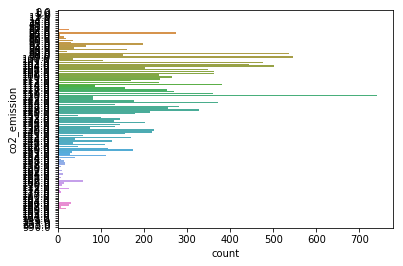

In [26]:
sns.countplot(y=df_v.co2_emission)
df_v.co2_emission.value_counts(dropna=False).sort_index()

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

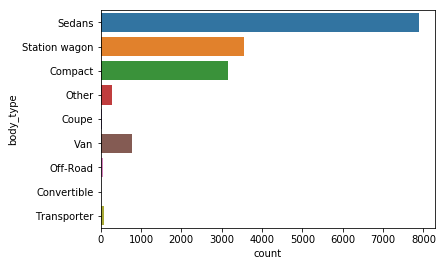

In [12]:
# 
sns.countplot(y=df_v.body_type)
df_v.body_type.value_counts(dropna=False)

Renault    2864
Opel       7343
Audi       5712
Name: make, dtype: int64

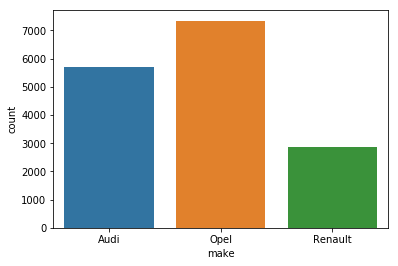

In [16]:
sns.countplot(x=df_v.make)
df_v.make.value_counts(dropna=False).sort_index(ascending=False)

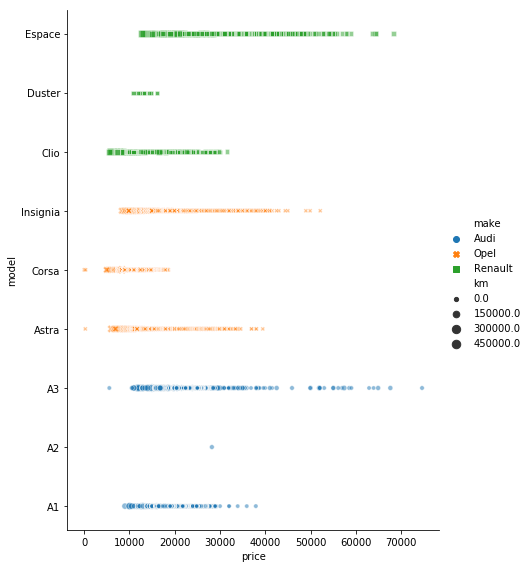

In [21]:
# trying a relative plot.
sns.relplot(x='price', y='model', data=df_v, size='km', hue='make', alpha=0.5, style='make', 
            height=8, aspect=.8)

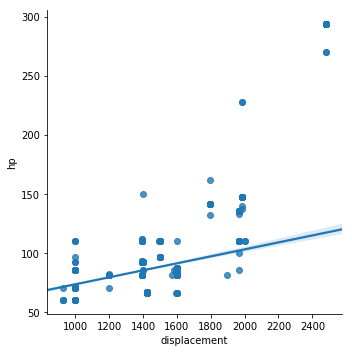

In [77]:
# Plot a linear regression between 'weight' and 'hp'
sns.lmplot(x='displacement', y='hp', data=audi)

# Display the plot
plt.show()

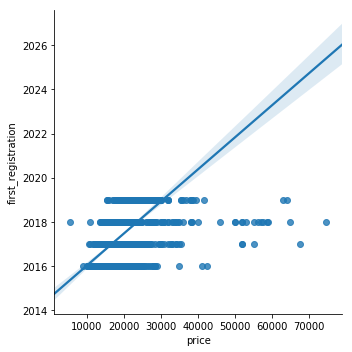

In [82]:
# Plot a linear regression between 'weight' and 'hp'
sns.lmplot(y='first_registration', x='price', data=audi)

# Display the plot
plt.show()

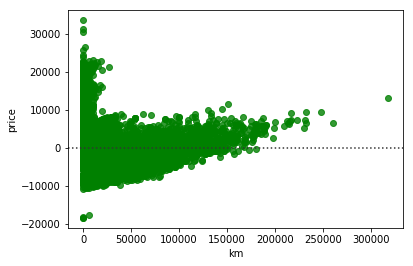

In [84]:
# Generate a green residual plot of the regression between 'hp' and 'mpg'
sns.residplot(x='km', y='price', data=opel, color='green')

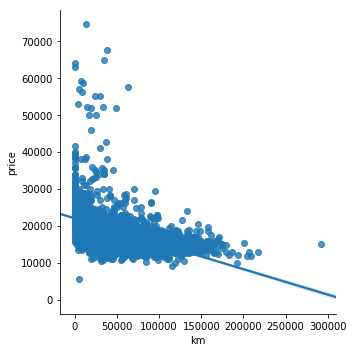

In [85]:
# Plot a linear regression between 'weight' and 'hp'
sns.lmplot(x='km', y='price', data=audi)

# Display the plot
plt.show()

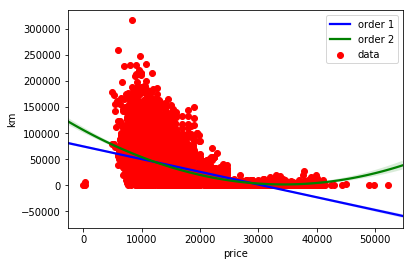

In [86]:
# Generate a scatter plot of 'weight' and 'mpg' using red circles
plt.scatter(opel['price'], opel['km'], label='data', color='red', marker='o')

# Plot in blue a linear regression of order 1 between 'weight' and 'mpg'
sns.regplot(x='price', y='km', data=opel, scatter=None, color="blue", label='order 1', order=1)

# Plot in green a linear regression of order 2 between 'weight' and 'mpg'
sns.regplot(x='price', y='km', data=opel, scatter=None, color="green", label='order 2', order=2)

# Add a legend and display the plot
plt.legend(loc="upper right")
plt.show()

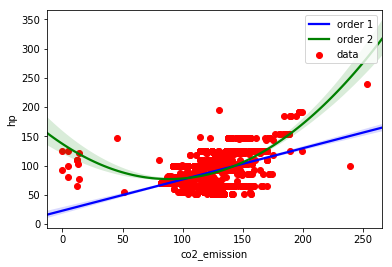

In [90]:
# Generate a scatter plot of 'weight' and 'mpg' using red circles
plt.scatter(opel['co2_emission'], opel['hp'], label='data', color='red', marker='o')

# Plot in blue a linear regression of order 1 between 'weight' and 'mpg'
sns.regplot(x='co2_emission', y='hp', data=opel, scatter=None, color="blue", label='order 1', order=1)

# Plot in green a linear regression of order 2 between 'weight' and 'mpg'
sns.regplot(x='co2_emission', y='hp', data=opel, scatter=None, color="green", label='order 2', order=2)

# Add a legend and display the plot
plt.legend(loc="upper right")
plt.show()

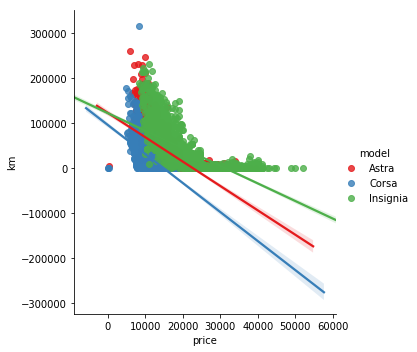

In [95]:
# Plot a linear regression between 'weight' and 'hp', with a hue of 'origin' and palette of 'Set1'
sns.lmplot(x="price", y="km", data=opel, hue="model", palette="Set1")

# Display the plot
plt.show()

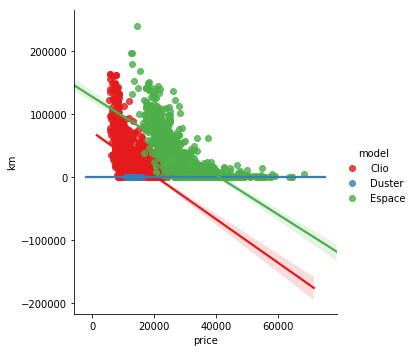

In [97]:
# Plot a linear regression between 'weight' and 'hp', with a hue of 'origin' and palette of 'Set1'
sns.lmplot(x="price", y="km", data=renault, hue="model", palette="Set1")

# Display the plot
plt.show()

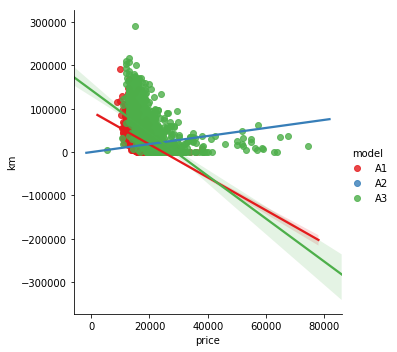

In [98]:
# Plot a linear regression between 'weight' and 'hp', with a hue of 'origin' and palette of 'Set1'
sns.lmplot(x="price", y="km", data=audi, hue="model", palette="Set1")

# Display the plot
plt.show()

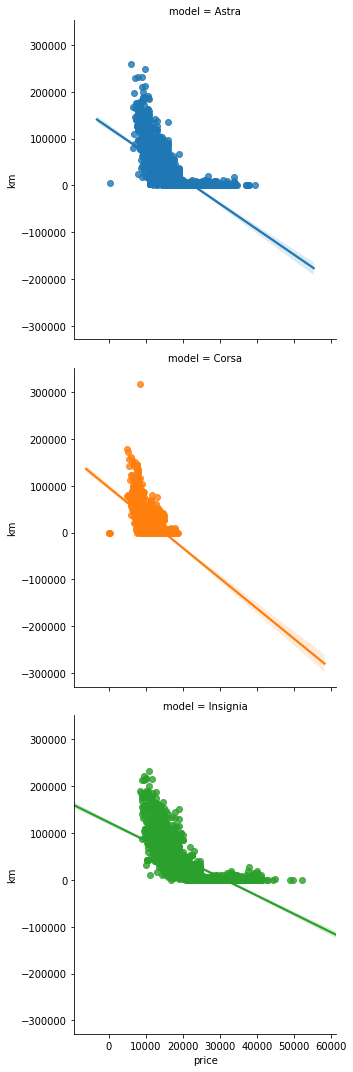

In [99]:
# Plot linear regressions between 'weight' and 'hp' grouped row-wise by 'origin'
sns.lmplot(x="price", y="km", data=opel, hue="model", row="model")

# Display the plot
plt.show()

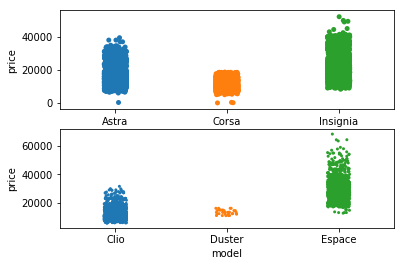

In [102]:
# Make a strip plot of 'hp' grouped by 'cyl'
plt.subplot(2,1,1)
sns.stripplot(x="model", y="price", data=opel)

# Make the strip plot again using jitter and a smaller point size
plt.subplot(2,1,2)
sns.stripplot(x="model", y="price", data=renault, jitter=True, size=3)

# Display the plot
plt.show()

In [ ]:
# Generate a swarm plot of 'hp' grouped horizontally by 'cyl'  
plt.subplot(2,1,1)
sns.swarmplot(x="model", y="km", data=opel)

# Generate a swarm plot of 'hp' grouped vertically by 'cyl' with a hue of 'origin'
plt.subplot(2,1,2)
sns.swarmplot(x="model", y="price", data=opel, hue="body", orient="h")

# Display the plot
plt.show()

In [11]:
num_cols= """co2_emission
cylinders
displacement
hp
kmconsumption_comb
gears
inspection_new
price
agefirst_registration
nr_of_doors
nr_of_seats
previous_owners"""

In [19]:
num_cols_1= ['co2_emission', 'cylinders', 'displacement', 'hp', 'consumption_comb', 'gears', 'nr_of_doors', 'nr_of_seats',]
num_cols_2 = ['km', 'price', 'age', 'first_registration', 'previous_owners']

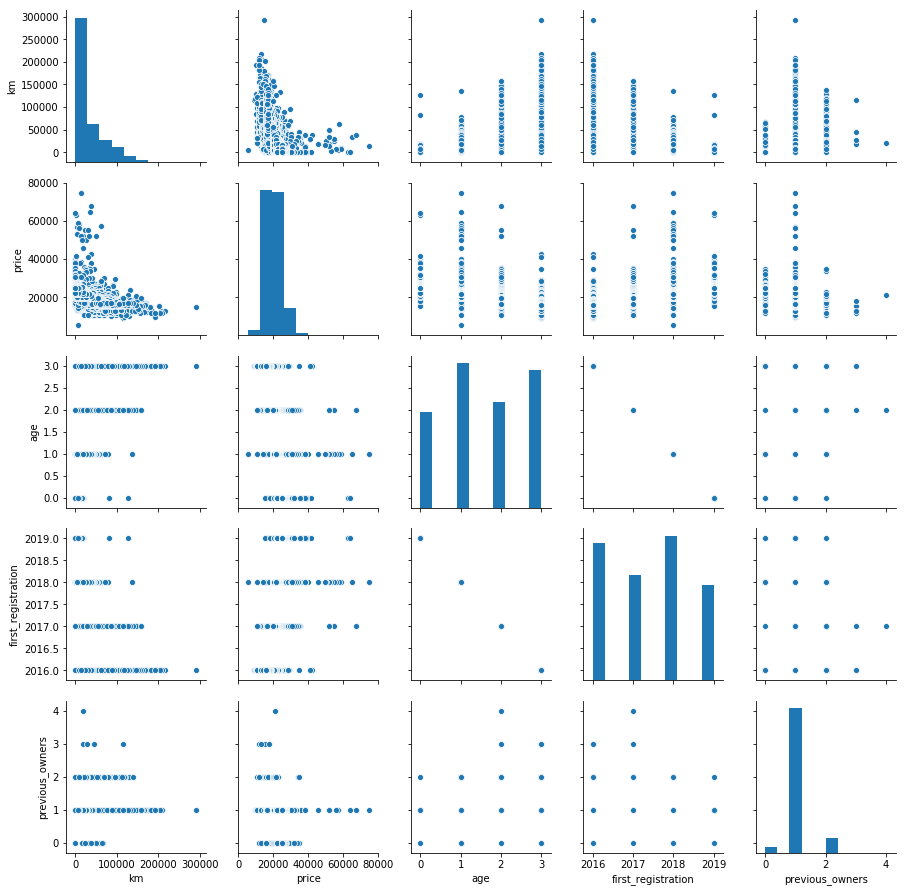

In [21]:
# Plot the pairwise joint distributions from the DataFrame 
sns.pairplot(audi[num_cols_2])

# Display the plot
plt.show()

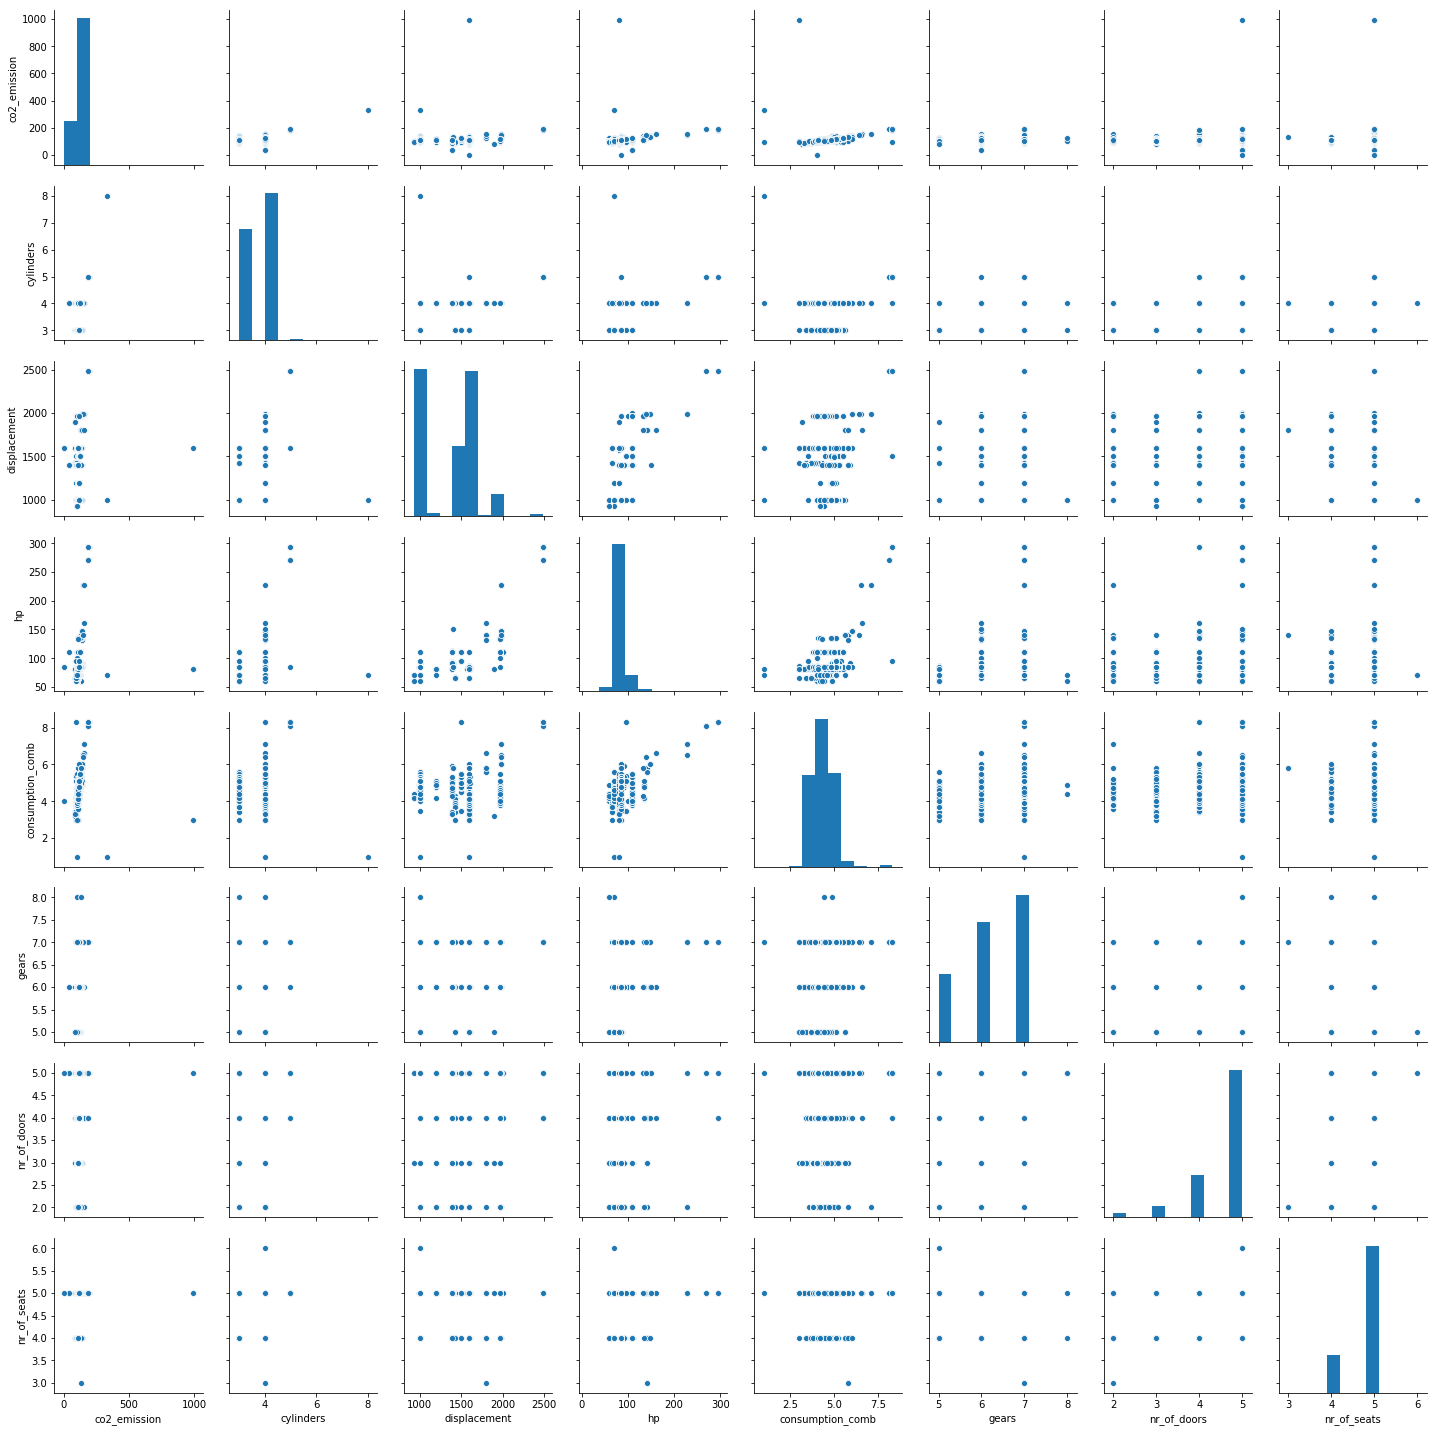

In [20]:
# Plot the pairwise joint distributions from the DataFrame 
sns.pairplot(audi[num_cols_1])

# Display the plot
plt.show()

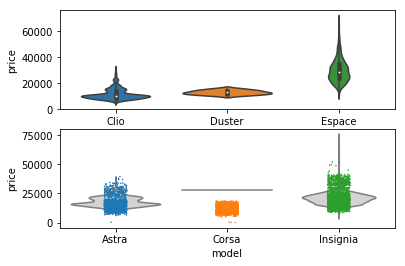

In [13]:
# Generate a violin plot of 'hp' grouped horizontally by 'cyl'
plt.subplot(2,1,1)
sns.violinplot(x="model", y="price", data=renault)

# Generate the same violin plot again with a color of 'lightgray' and without inner annotations
plt.subplot(2,1,2)
sns.violinplot(x="model", y="price", data=audi, color="lightgray", inner=None)

# Overlay a strip plot on the violin plot
sns.stripplot(x="model", y="price", data=opel, jitter=True, size=1.5)

# Display the plot
plt.show()

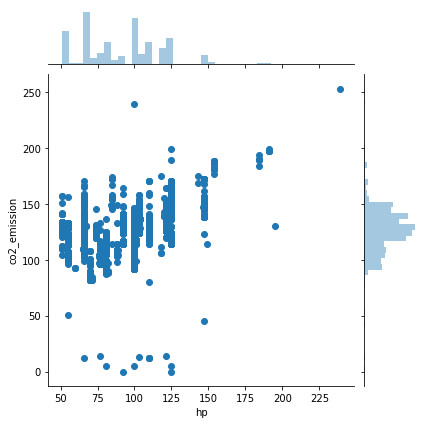

In [22]:
# Generate a joint plot of 'hp' and 'mpg'
sns.jointplot(x="hp", y="co2_emission", data=opel)

# Display the plot
plt.show()

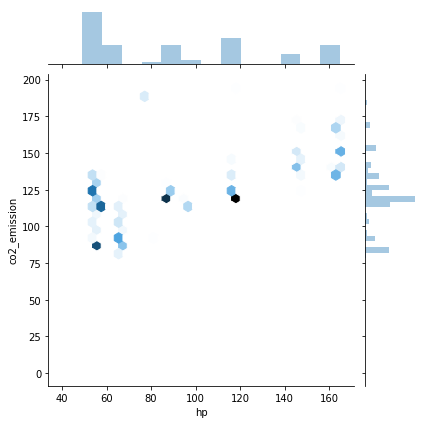

In [23]:
# Generate a joint plot of 'hp' and 'mpg' using a hexbin plot
sns.jointplot(x="hp", y="co2_emission", data=renault, kind="hex")

# Display the plot
plt.show()

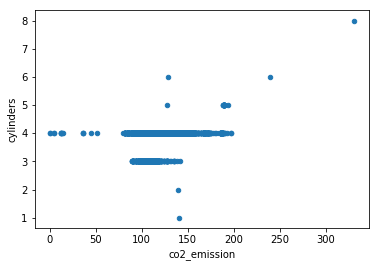

In [24]:
df_v.plot(x="co2_emission", y = "cylinders", kind="scatter")
plt.show()

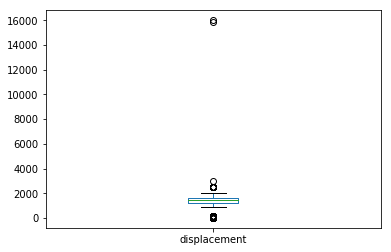

In [28]:
df_v.plot(y="displacement", kind="box")
plt.show()

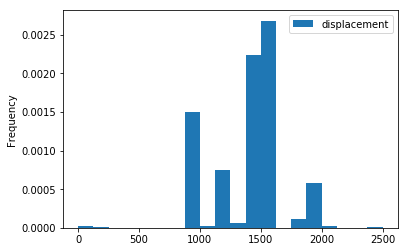

In [41]:
df_v.plot(y="displacement", kind="hist", bins=20, range=(0,2500), density=True)
plt.show()

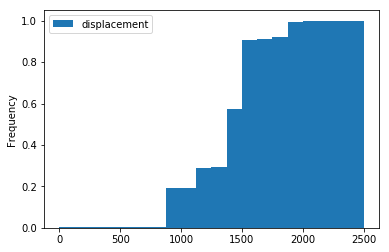

In [44]:
df_v.plot(y="displacement", kind="hist", bins=20, range=(0,2500), cumulative=True, density=True)
plt.show()

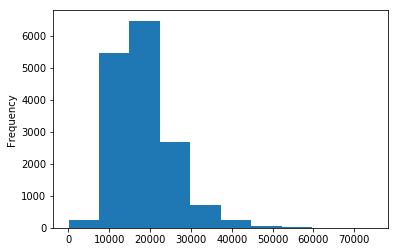

In [51]:
df_v.price.plot(kind="hist")
plt.show()

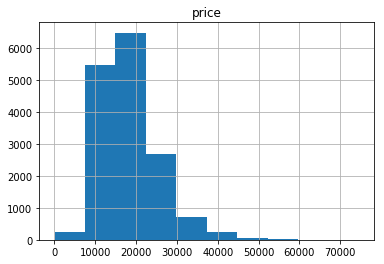

In [55]:
df_v[["price"]].hist()
plt.show()

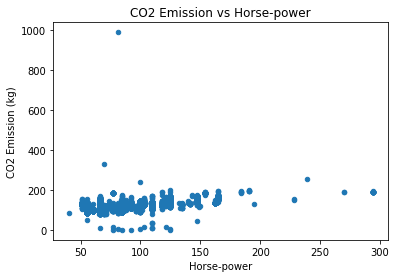

In [57]:
# Generate a scatter plot
df_v.plot(kind="scatter", x='hp', y='co2_emission')

# Add the title
plt.title('CO2 Emission vs Horse-power')

# Add the x-axis label
plt.xlabel('Horse-power')

# Add the y-axis label
plt.ylabel('CO2 Emission (kg)')

# Display the plot
plt.show()

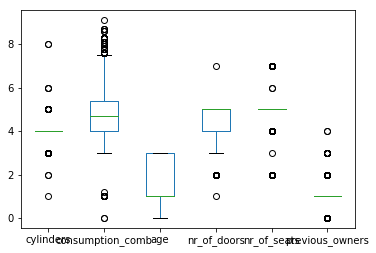

In [47]:
# Make a list of the column names to be plotted: cols
cols = ["cylinders", "consumption_comb", "age", "nr_of_doors", "nr_of_seats", "previous_owners"]

# Generate the box plots
df_v[cols].plot(kind="box")

# Display the plot
plt.show()

In [64]:
df_v[["first_registration", "emission_label"]].count()

first_registration    14322
emission_label         3945
dtype: int64

In [9]:
df_v["nr_of_doors"].mean()

4.656076908384796

In [10]:
df_v[["first_registration", "nr_of_seats"]].std()

first_registration    1.076917
nr_of_seats           0.489872
dtype: float64

In [11]:
df_v[["first_registration", "nr_of_seats"]].median()

first_registration    2018.0
nr_of_seats              5.0
dtype: float64

In [15]:
q = 0.5
df_v[["first_registration", "nr_of_seats", "nr_of_doors"]].quantile(q)

first_registration    2018.0
nr_of_seats              5.0
nr_of_doors              5.0
Name: 0.5, dtype: float64

In [16]:
q = [0.25, 0.75]
df_v[["first_registration", "nr_of_seats", "nr_of_doors"]].quantile(q)

first_registration  nr_of_seats  nr_of_doors
0.25              2016.0          5.0          4.0
0.75              2018.0          5.0          5.0

In [17]:
df_v[["first_registration", "nr_of_seats", "nr_of_doors"]].min()

first_registration    2016.0
nr_of_seats              2.0
nr_of_doors              1.0
dtype: float64

In [24]:
# calculate the mean of every row
mean = df_v.mean(axis="columns")
mean

0         690.718919
1         908.169091
2         935.181651
3         824.676786
4         333.310000
5         757.866972
6         749.015455
7         301.097273
8         703.702679
9         350.924528
10        317.309091
11        441.063303
12        487.862727
13        645.019048
14        511.519643
15        453.863393
16        305.995455
17        462.426786
18        663.550000
19        328.126606
20        668.008929
21        350.195536
22        364.097321
23        303.588182
24        231.441071
25       1166.938182
26        905.588991
27        745.225000
28        343.419444
29        341.209346
            ...     
15889     478.145455
15890     433.293519
15891     442.019091
15892     423.885047
15893     442.019091
15894     477.033636
15895     582.270536
15896     451.858333
15897     425.891071
15898     431.755455
15899     469.904464
15900     518.827778
15901     431.755455
15902     417.233654
15903     419.285714
15904     432.866364
15905     422

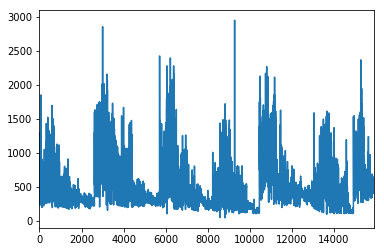

In [25]:
mean.plot()

# Display the plot
plt.show()

In [26]:
df_v.nr_of_doors.unique()

array([ 5.,  3.,  4.,  2., nan,  1.,  7.])

In [59]:
df_v.head(3)

co2_emission country_version  cylinders  displacement  make model  \
0          99.0             NaN        3.0        1422.0  Audi    A1   
1         129.0             NaN        4.0        1798.0  Audi    A1   
2          99.0             NaN        NaN        1598.0  Audi    A1   

  model_code next_inspection body_type  \
0   0588/BDF         06/2021    Sedans   
1   0588/BCY             NaN    Sedans   
2        NaN             NaN    Sedans   

                                         description     hp       km  \
0  Sicherheit: Deaktivierung für Beifahrer-Airbag...   66.0  56013.0   
1  Sicherheit: Deaktivierung für Beifahrer-Airbag...  141.0  80000.0   
2  Sicherheit: Deaktivierung für Beifahrer-Airbag...   85.0  83450.0   

  offer_number  ss_abs  ss_adaptive_cruise_control  ss_adaptive_headlights  \
0    LR-062483       1                           0                       0   
1          NaN       1                           0                       0   
2     AM-95365       1                           0                       0   

   ss_alarm_system  ss_blind_spot_monitor  ss_central_door_lock  \
0                0                      0                     1   
1                0                      0                     1   
2                0                      0                     1   

   ss_central_door_lock_with_remote_control  ss_daytime_running_lights  \
0                                         0                          1   
1                                         1                          1   
2                                         0                          1   

   ss_driver_drowsiness_detection  ss_driver_side_airbag  \
0                               0                      1   
1                               0                      1   
2                               0                      1   

   ss_electronic_stability_control  ss_emergency_brake_assistant  \
0                                1                             0   
1                                1                             0   
2                                1                             0   

   ss_emergency_system  ss_fog_lights  ss_head_airbag  ss_immobilizer  \
0                    0              1               0               1   
1                    0              0               1               1   
2                    0              0               0               1   

   ss_isofix  ss_led_daytime_running_lights  ss_led_headlights  \
0          1                              0                  0   
1          1                              0                  0   
2          1                              0                  0   

   ss_lane_departure_warning_system  ss_night_view_assist  \
0                                 0                     0   
1                                 0                     0   
2                                 0                     0   

   ss_passenger_side_airbag  ss_power_steering  ss_rear_airbag  \
0                         1                  1               0   
1                         1                  1               0   
2                         1                  1               0   

   ss_side_airbag  ss_tire_pressure_monitoring_system  ss_traction_control  \
0               1                                   1                    1   
1               1                                   1                    1   
2               1                                   1                    1   

   ss_traffic_sign_recognition  ss_xenon_headlights  next_inspection_bool  \
0                            0                    1                  True   
1                            0                    1                 False   
2                            0                    0                 False   

   consumption_comb available_from    body body_color gearing_type  gears  \
0               3.8            NaN  Sedans      Black    Automatic    NaN   
1               5.6

In [28]:
audi.tail(2)

co2_emission country_version  cylinders  displacement model model_code  \
5710         113.0         Germany        3.0         999.0    A3   0588/BHX   
5711         113.0         Germany        3.0         999.0    A3   0588/BHX   

     next_inspection body_type  \
5710             NaN    Sedans   
5711             NaN    Sedans   

                                            description    hp    km  \
5710  Sicherheit: Deaktivierung für Beifahrer-Airbag...  85.0  10.0   
5711  Sicherheit: Deaktivierung für Beifahrer-Airbag...  85.0  10.0   

     offer_number  ss_abs  ss_adaptive_cruise_control  ss_adaptive_headlights  \
5710       GDR658       1                           0                       0   
5711       GDR657       1                           0                       0   

      ss_alarm_system  ss_blind_spot_monitor  ss_central_door_lock  \
5710                0                      0                     1   
5711                0                      0                     1   

      ss_central_door_lock_with_remote_control  ss_daytime_running_lights  \
5710                                         0                          1   
5711                                         0                          1   

      ss_driver_drowsiness_detection  ss_driver_side_airbag  \
5710                               0                      1   
5711                               0                      1   

      ss_electronic_stability_control  ss_emergency_brake_assistant  \
5710                                1                             0   
5711                                1                             0   

      ss_emergency_system  ss_fog_lights  ss_head_airbag  ss_immobilizer  \
5710                    0              0               0               1   
5711                    0              0               0               1   

      ss_isofix  ss_led_daytime_running_lights  ss_led_headlights  \
5710          1                              0                  0   
5711          1                              0                  0   

      ss_lane_departure_warning_system  ss_night_view_assist  \
5710                                 0                     0   
5711                                 0                     0   

      ss_passenger_side_airbag  ss_power_steering  ss_rear_airbag  \
5710                         1                  1               0   
5711                         1                  1               0   

      ss_side_airbag  ss_tire_pressure_monitoring_system  ss_traction_control  \
5710               1                                   1                    1   
5711               1                                   1                    1   

      ss_traffic_sign_recognition  ss_xenon_headlights  next_inspection_bool  \
5710                            0                    1                 False   
5711                            0                    1                 False   

      consumption_comb available_from    body body_color gearing_type  gears  \
5710               4.8            NaN  Sedans     Silver       Manual    6.0   
5711               4.8            NaN  Sedans     Silver       Manual    6.0   

      inspection_new last_service_date paint_type  price             vat  age  \
5710               0               NaN   Metallic  24980  VAT deductible  NaN   
5711               0               NaN   Metallic  24980  VAT deductible  NaN   

      entertainment_media_bluetooth  entertainment_media_cd_player  \
5710                              1                              1   
5711                              1                              1   

      entertainment_media_digital_radio  \
5710                                  0   
5711                                  0   

      entertainment_media_hands_free_equipment  entertainment_media_mp3  \
5710                                         1                        0   
5711                                         1            

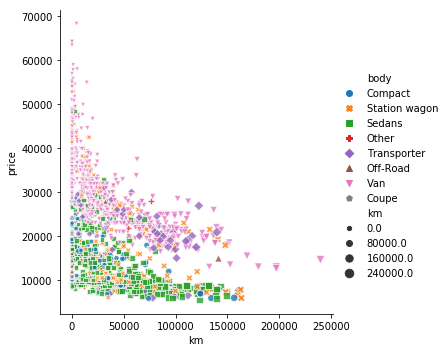

In [48]:
# relative plot for renault.
sns.relplot(x='km', y='price', 
            data=renault, size='km', hue='body', alpha=0.8, style='body')

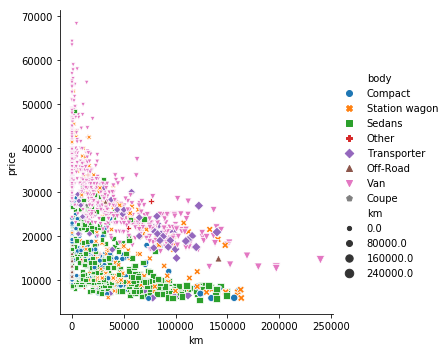

In [47]:
sns.relplot(y='price', x='km', data=renault, kind='scatter', size='km', style='body', hue='body')

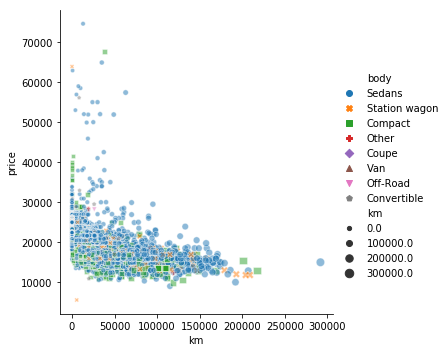

In [45]:
# relative plot for audi.
sns.relplot(x='km', y='price', 
            data=audi, size='km', hue='body', alpha=0.5, style='body')

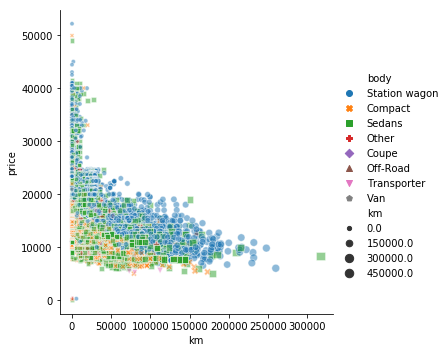

In [44]:
# relative plot for opel.
sns.relplot(x='km', y='price', 
            data=opel, size='km', hue='body', alpha=0.5, style='body')

In [52]:
corr = renault.corr()

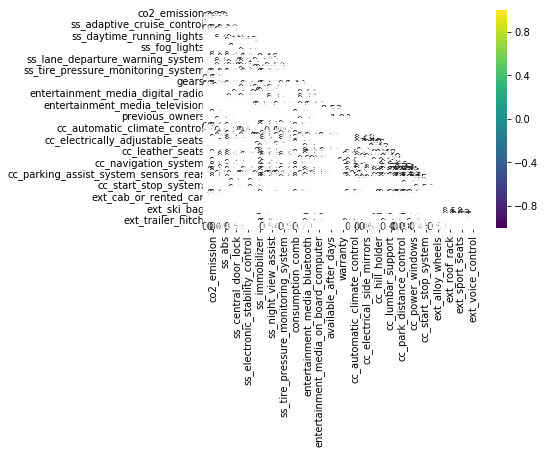

In [56]:
# Generating a mask for the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))
# Add the mask to the heatmap and see the corr matrix as a heatmap
sns.heatmap(corr, mask=mask, cmap=cm.viridis, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

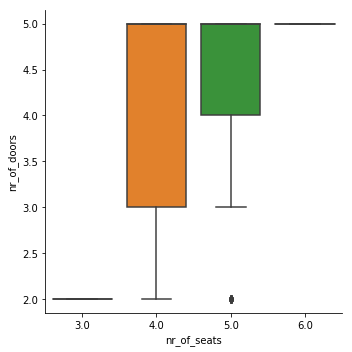

In [67]:
sns.catplot(y='nr_of_doors', x='nr_of_seats', data=audi, kind='box')

In [ ]:
sns.lineplot(x=audi.nr_of_seats, y=audi.nr_of_doors)

In [60]:
audi_mlt_idx = audi.set_index(["model", "gearing_type"])
audi_mlt_idx= audi_mlt_idx.sort_index()
audi_mlt_idx

co2_emission country_version  cylinders  displacement  \
model gearing_type                                                            
A1    Automatic               99.0             NaN        3.0        1422.0   
      Automatic              129.0             NaN        4.0        1798.0   
      Automatic               99.0             NaN        NaN        1598.0   
      Automatic               99.0             NaN        3.0        1422.0   
      Automatic              109.0         Germany        3.0        1422.0   
      Automatic               92.0         Germany        NaN        1598.0   
      Automatic               98.0         Germany        4.0        1598.0   
      Automatic               97.0             NaN        NaN        1422.0   
      Automatic               97.0             NaN        4.0        1598.0   
      Automatic                NaN             NaN        NaN         999.0   
      Automatic              105.0           Italy        4.0        1598.0   
      Automatic              112.0             NaN        4.0        1395.0   
      Automatic              112.0         Germany        4.0        1395.0   
      Automatic                NaN             NaN        NaN        1395.0   
      Automatic               99.0         Germany        3.0         999.0   
      Automatic               97.0             NaN        4.0        1598.0   
      Automatic               92.0             NaN        4.0        1598.0   
      Automatic               99.0         Belgium        3.0        1422.0   
      Automatic              103.0     Netherlands        3.0         999.0   
      Automatic               99.0             NaN        4.0        1598.0   
      Automatic              105.0           Italy        4.0        1598.0   
      Automatic              112.0         Germany        4.0        1395.0   
      Automatic              112.0             NaN        4.0        1395.0   
      Automatic               97.0             NaN        4.0        1598.0   
      Automatic              102.0           Italy        3.0         999.0   
      Automatic               99.0             NaN        3.0        1422.0   
      Automatic              103.0     Netherlands        3.0         999.0   
      Automatic                NaN             NaN        4.0        1598.0   
      Automatic                NaN             NaN        3.0         999.0   
      Automatic              102.0         Belgium        3.0         999.0   
...                            ...             ...        ...           ...   
A3    Semi-automatic         103.0           Italy        4.0        1598.0   
      Semi-automatic         128.0           Italy        4.0        1968.0   
      Semi-automatic         117.0             NaN        4.0        1968.0   
      Semi-automatic         126.0             NaN        4.0        1968.0   
      Semi-automatic         103.0           Italy        4.0        1598.0   
      Semi-automatic         101.0           Italy        4.0        1598.0   
      Semi-automatic         103.0           Italy        4.0        1598.0   
      Semi-automatic          99.0           Italy        4.0        1598.0   
      Semi-automatic         118.0             NaN        4.0        1968.0   
      Semi-automatic         117.0           Italy        3.0         999.0   
      Semi-automatic         103.0           Italy        4.0        1598.0   
      Semi-automatic         114.0             NaN        4.0        1968.0   
      Semi-automatic         107.0             NaN        3.0           NaN   
      Semi-automatic         188.0     Netherlands        5.0        2480.0   
      Semi-automatic         189.0     Netherlands        5.0        2480.0   
      Semi-automatic         112.0           Italy        4.0        1498.0   
      Semi-automatic          97.0           Italy        4.0        1498.0   
      Semi-automatic         126.0             NaN        4.0        196

In [61]:
audi_mlt_idx = audi_mlt_idx.swaplevel(0,1)
audi_mlt_idx

co2_emission country_version  cylinders  displacement  \
gearing_type   model                                                          
Automatic      A1             99.0             NaN        3.0        1422.0   
               A1            129.0             NaN        4.0        1798.0   
               A1             99.0             NaN        NaN        1598.0   
               A1             99.0             NaN        3.0        1422.0   
               A1            109.0         Germany        3.0        1422.0   
               A1             92.0         Germany        NaN        1598.0   
               A1             98.0         Germany        4.0        1598.0   
               A1             97.0             NaN        NaN        1422.0   
               A1             97.0             NaN        4.0        1598.0   
               A1              NaN             NaN        NaN         999.0   
               A1            105.0           Italy        4.0        1598.0   
               A1            112.0             NaN        4.0        1395.0   
               A1            112.0         Germany        4.0        1395.0   
               A1              NaN             NaN        NaN        1395.0   
               A1             99.0         Germany        3.0         999.0   
               A1             97.0             NaN        4.0        1598.0   
               A1             92.0             NaN        4.0        1598.0   
               A1             99.0         Belgium        3.0        1422.0   
               A1            103.0     Netherlands        3.0         999.0   
               A1             99.0             NaN        4.0        1598.0   
               A1            105.0           Italy        4.0        1598.0   
               A1            112.0         Germany        4.0        1395.0   
               A1            112.0             NaN        4.0        1395.0   
               A1             97.0             NaN        4.0        1598.0   
               A1            102.0           Italy        3.0         999.0   
               A1             99.0             NaN        3.0        1422.0   
               A1            103.0     Netherlands        3.0         999.0   
               A1              NaN             NaN        4.0        1598.0   
               A1              NaN             NaN        3.0         999.0   
               A1            102.0         Belgium        3.0         999.0   
...                            ...             ...        ...           ...   
Semi-automatic A3            103.0           Italy        4.0        1598.0   
               A3            128.0           Italy        4.0        1968.0   
               A3            117.0             NaN        4.0        1968.0   
               A3            126.0             NaN        4.0        1968.0   
               A3            103.0           Italy        4.0        1598.0   
               A3            101.0           Italy        4.0        1598.0   
               A3            103.0           Italy        4.0        1598.0   
               A3             99.0           Italy        4.0        1598.0   
               A3            118.0             NaN        4.0        1968.0   
               A3            117.0           Italy        3.0         999.0   
               A3            103.0           Italy        4.0        1598.0   
               A3            114.0             NaN        4.0        1968.0   
               A3            107.0             NaN        3.0           NaN   
               A3            188.0     Netherlands        5.0        2480.0   
               A3            189.0     Netherlands        5.0        2480.0   
               A3            112.0           Italy        4.0        1498.0   
               A3             97.0           Italy        4.0        1498.0   
               A3            126.0             NaN        4.0        196

In [51]:
a1_manual_km = audi.loc[("A1", "Manual"), "km"]
a1_manual_km

model  gearing_type
A1     Manual          115000.0
       Manual           84029.0
       Manual           67800.0
       Manual           22000.0
       Manual           38400.0
       Manual           83307.0
       Manual           39668.0
       Manual           30353.0
       Manual          126000.0
       Manual           57500.0
       Manual           73945.0
       Manual           96000.0
       Manual           43120.0
       Manual          110715.0
       Manual           31971.0
       Manual           94800.0
       Manual           85000.0
       Manual          111265.0
       Manual           44120.0
       Manual           97976.0
       Manual          106000.0
       Manual           60000.0
       Manual           58000.0
       Manual           57454.0
       Manual           94055.0
       Manual           56000.0
       Manual           27600.0
       Manual          111670.0
       Manual           30500.0
       Manual           69500.0
                    

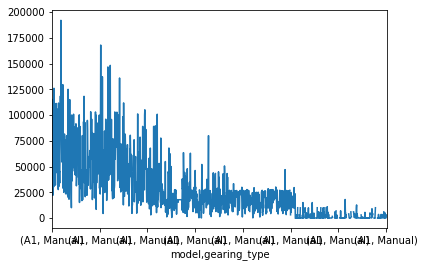

In [52]:
a1_manual_km.plot()
plt.show()

In [2]:
audi.describe(exclude='number')

NameError: name 'audi' is not defined

In [42]:
opel.head(2)

co2_emission country_version  cylinders  displacement  model model_code  \
5712         119.0         Germany        4.0        1598.0  Astra   0035/BHZ   
5713           NaN             NaN        NaN           NaN  Astra        NaN   

     next_inspection      body_type  \
5712         05/2021  Station wagon   
5713             NaN  Station wagon   

                                            description     hp        km  \
5712  Sicherheit: Deaktivierung für Beifahrer-Airbag...  100.0  260000.0   
5713  Sicherheit: Deaktivierung für Beifahrer-Airbag...  100.0  112388.0   

     offer_number  ss_abs  ss_adaptive_cruise_control  ss_adaptive_headlights  \
5712          NaN       1                           0                       0   
5713      2740818       0                           0                       0   

      ss_alarm_system  ss_blind_spot_monitor  ss_central_door_lock  \
5712                0                      0                     1   
5713                0                      0                     0   

      ss_central_door_lock_with_remote_control  ss_daytime_running_lights  \
5712                                         1                          0   
5713                                         0                          0   

      ss_driver_drowsiness_detection  ss_driver_side_airbag  \
5712                               0                      1   
5713                               0                      0   

      ss_electronic_stability_control  ss_emergency_brake_assistant  \
5712                                1                             1   
5713                                0                             0   

      ss_emergency_system  ss_fog_lights  ss_head_airbag  ss_immobilizer  \
5712                    0              1               1               1   
5713                    0              0               0               0   

      ss_isofix  ss_led_daytime_running_lights  ss_led_headlights  \
5712          1                              1                  0   
5713          0                              0                  0   

      ss_lane_departure_warning_system  ss_night_view_assist  \
5712                                 1                     0   
5713                                 0                     0   

      ss_passenger_side_airbag  ss_power_steering  ss_rear_airbag  \
5712                         1                  1               0   
5713                         0                  0               0   

      ss_side_airbag  ss_tire_pressure_monitoring_system  ss_traction_control  \
5712               1                                   1                    1   
5713               0                                   0                    0   

      ss_traffic_sign_recognition  ss_xenon_headlights  next_inspection_bool  \
5712                            1                    0                  True   
5713                            0                    0                 False   

      consumption_comb available_from           body body_color gearing_type  \
5712               4.5            NaN  Station wagon     Silver    Automatic   
5713               NaN            NaN  Station wagon       Grey    Automatic   

      gears  inspection_new last_service_date paint_type  price  \
5712    6.0               0               NaN   Metallic   6000   
5713    NaN               0               NaN   Metallic  10550   

                 vat  age  entertainment_media_bluetooth  \
5712             NaN  3.0                              1   
5713  VAT deductible  3.0                              0   

      entertainment_media_cd_player  entertainment_media_digital_radio  \
5712                              0                                  0   
5713                              0                                  0   

      entertainment_media_hands_free_equipment  entertainment_media_mp3  \
5712                                         1                        0   
5713

In [44]:
opel.tail(2)

co2_emission country_version  cylinders  displacement     model  \
13053         128.0         Germany        4.0        1490.0  Insignia   
13054         187.0  European Union        4.0        2000.0  Insignia   

      model_code next_inspection      body_type  \
13053   1844/AAH             NaN  Station wagon   
13054        NaN             NaN  Station wagon   

                                             description     hp    km  \
13053  Sicherheit: Deaktivierung für Beifahrer-Airbag...  103.0   NaN   
13054  Sicherheit: Deaktivierung für Beifahrer-Airbag...  154.0  10.0   

      offer_number  ss_abs  ss_adaptive_cruise_control  \
13053  DBF_7604689       1                           0   
13054       ISGSI8       1                           1   

       ss_adaptive_headlights  ss_alarm_system  ss_blind_spot_monitor  \
13053                       0                0                      0   
13054                       1                0                      1   

       ss_central_door_lock  ss_central_door_lock_with_remote_control  \
13053                     1                                         0   
13054                     1                                         0   

       ss_daytime_running_lights  ss_driver_drowsiness_detection  \
13053                          0                               0   
13054                          1                               0   

       ss_driver_side_airbag  ss_electronic_stability_control  \
13053                      1                                1   
13054                      1                                1   

       ss_emergency_brake_assistant  ss_emergency_system  ss_fog_lights  \
13053                             0                    0              1   
13054                             1                    0              0   

       ss_head_airbag  ss_immobilizer  ss_isofix  \
13053               0               0          0   
13054               0               1          1   

       ss_led_daytime_running_lights  ss_led_headlights  \
13053                              0                  0   
13054                              1                  1   

       ss_lane_departure_warning_system  ss_night_view_assist  \
13053                                 0                     0   
13054                                 1                     0   

       ss_passenger_side_airbag  ss_power_steering  ss_rear_airbag  \
13053                         1                  1               0   
13054                         1                  1               0   

       ss_side_airbag  ss_tire_pressure_monitoring_system  \
13053               1                                   0   
13054               1                                   1   

       ss_traction_control  ss_traffic_sign_recognition  ss_xenon_headlights  \
13053                    1                            0                    0   
13054                    1                            1                    0   

       next_inspection_bool  consumption_comb available_from           body  \
13053                 False               5.6            NaN  Station wagon   
13054                 False               7.1     2019-08-19  Station wagon   

      body_color gearing_type  gears  inspection_new last_service_date  \
13053        NaN       Manual    6.0               0               NaN   
13054      Black    Automatic    8.0               0               NaN   

      paint_type  price             vat  age  entertainment_media_bluetooth  \
13053        NaN  23025  VAT deductible  NaN                              0   
13054   Metallic  37950  VAT deductible  NaN                              1   

       entertainment_media_cd_player  entertainment_media_digital_radio  \
13053                              0                                  0   
13054                              0                                  1   

       entertainment_media_hands_free_equipment  entertainment_media_mp3  \


In [45]:
renault.head(2)

co2_emission country_version  cylinders  displacement model model_code  \
13055          92.0             NaN        NaN        1461.0  Clio   3333/AZY   
13056          92.0             NaN        4.0        1461.0  Clio        NaN   

      next_inspection      body_type  \
13055         04/2021        Compact   
13056             NaN  Station wagon   

                                             description    hp        km  \
13055  Sicherheit: Deaktivierung für Beifahrer-Airbag...  66.0  161556.0   
13056  Sicherheit: Deaktivierung für Beifahrer-Airbag...  66.0   22000.0   

      offer_number  ss_abs  ss_adaptive_cruise_control  \
13055          NaN       1                           0   
13056          NaN       1                           0   

       ss_adaptive_headlights  ss_alarm_system  ss_blind_spot_monitor  \
13055                       0                0                      0   
13056                       0                0                      0   

       ss_central_door_lock  ss_central_door_lock_with_remote_control  \
13055                     1                                         0   
13056                     1                                         1   

       ss_daytime_running_lights  ss_driver_drowsiness_detection  \
13055                          1                               0   
13056                          1                               0   

       ss_driver_side_airbag  ss_electronic_stability_control  \
13055                      1                                1   
13056                      1                                1   

       ss_emergency_brake_assistant  ss_emergency_system  ss_fog_lights  \
13055                             0                    0              1   
13056                             0                    0              1   

       ss_head_airbag  ss_immobilizer  ss_isofix  \
13055               0               1          1   
13056               0               0          0   

       ss_led_daytime_running_lights  ss_led_headlights  \
13055                              1                  0   
13056                              1                  1   

       ss_lane_departure_warning_system  ss_night_view_assist  \
13055                                 0                     0   
13056                                 0                     0   

       ss_passenger_side_airbag  ss_power_steering  ss_rear_airbag  \
13055                         1                  1               0   
13056                         1                  1               0   

       ss_side_airbag  ss_tire_pressure_monitoring_system  \
13055               1                                   1   
13056               1                                   1   

       ss_traction_control  ss_traffic_sign_recognition  ss_xenon_headlights  \
13055                    1                            0                    0   
13056                    1                            1                    1   

       next_inspection_bool  consumption_comb available_from           body  \
13055                  True               3.5            NaN        Compact   
13056                 False               3.5            NaN  Station wagon   

      body_color gearing_type  gears  inspection_new last_service_date  \
13055      White    Automatic    NaN               0               NaN   
13056      White    Automatic    6.0               0               NaN   

      paint_type  price             vat  age  entertainment_media_bluetooth  \
13055        NaN   7650  VAT deductible  3.0                              1   
13056   Metallic  13100             NaN  3.0                              1   

       entertainment_media_cd_player  entertainment_media_digital_radio  \
13055                              0                                  0   
13056                              0                                  1   

       entertainment_media_hands_free_equipment  entertainment_media_mp3  \
130

In [48]:
global_mean = df_v[cols].mean()
global_mean

cylinders           3.797343
consumption_comb    4.784527
age                 1.542382
nr_of_doors         4.656077
nr_of_seats         4.949873
previous_owners     1.067895
dtype: float64

In [49]:
# Compute the global mean and global standard deviation: global_mean, global_std
global_mean = df_v[cols].mean()
global_std = df_v[cols].std()

# Compute the make means and make standard deviations: 
audi_mean = audi[cols].mean()
audi_std = audi[cols].std()

# Print the differences
print(audi_mean - global_mean)
print(audi_std - global_std)

cylinders          -0.218682
consumption_comb   -0.440169
age                 0.048204
nr_of_doors        -0.044131
nr_of_seats        -0.152771
previous_owners    -0.008923
dtype: float64
cylinders           0.093724
consumption_comb   -0.353432
age                 0.021530
nr_of_doors         0.051591
nr_of_seats        -0.086766
previous_owners     0.026285
dtype: float64


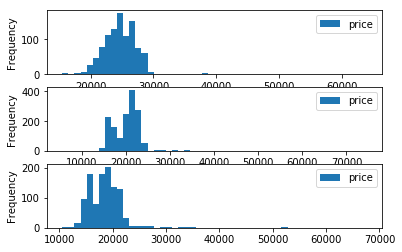

In [54]:
# Display the box plots on 3 separate rows and 1 column
fig, axes = plt.subplots(nrows=3, ncols=1)

# Generate a box plot of the fare prices for the First passenger class
audi.loc[audi['age'] == 0 ].plot(ax=axes[0], y='price', bins= 50, kind='hist')

# Generate a box plot of the fare prices for the Second passenger class
audi.loc[audi["age"] == 1 ].plot(ax=axes[1], y='price', bins= 50, kind='hist')

# Generate a box plot of the fare prices for the Third passenger class
audi.loc[audi["age"] == 2 ].plot(ax=axes[2], y='price', bins= 50, kind='hist')

# Display the plot
plt.show()

In [12]:
all_non_zero_columns = df_v.loc[:, df_v.all()] 
print(len(all_non_zero_columns.columns))
all_non_zero_columns.head(3)

33


country_version  cylinders  displacement  make model model_code  \
0             NaN        3.0        1422.0  Audi    A1   0588/BDF   
1             NaN        4.0        1798.0  Audi    A1   0588/BCY   
2             NaN        NaN        1598.0  Audi    A1        NaN   

  next_inspection body_type  \
0         06/2021    Sedans   
1             NaN    Sedans   
2             NaN    Sedans   

                                         description     hp offer_number  \
0  Sicherheit: Deaktivierung für Beifahrer-Airbag...   66.0    LR-062483   
1  Sicherheit: Deaktivierung für Beifahrer-Airbag...  141.0          NaN   
2  Sicherheit: Deaktivierung für Beifahrer-Airbag...   85.0     AM-95365   

  available_from    body body_color gearing_type  gears last_service_date  \
0            NaN  Sedans      Black    Automatic    NaN               NaN   
1            NaN  Sedans        Red    Automatic    7.0               NaN   
2            NaN  Sedans      Black    Automatic    NaN               NaN   

  paint_type  price               vat  available_after_days drive_chain  \
0   Metallic  15770    VAT deductible                   NaN       front   
1        NaN  14500  Price negotiable                   NaN       front   
2   Metallic  14640    VAT deductible                   NaN       front   

  emission_class emission_label  first_registration  \
0         Euro 6            NaN              2016.0   
1         Euro 6      4 (Green)              2017.0   
2         Euro 6      4 (Green)              2016.0   

                          fuel  nr_of_doors  nr_of_seats  type    upholstery  \
0  Diesel (Particulate Filter)          5.0          5.0  Used  Cloth, Black   
1                     Gasoline          3.0          4.0  Used   Cloth, Grey   
2  Diesel (Particulate Filter)          4.0          4.0  Used  Cloth, Black   

   prev_owner                                                url  weight_kg  
0         2.0  https://www.autoscout24.com//offers/audi-a1-sp...     1220.0  
1         NaN  https://www.autoscout24.com//offers/audi-a1-1-...     1255.0  
2         1.0  https://www.autoscout24.com//offers/audi-a1-sp...        NaN

In [13]:
any_non_zero_columns = df_v.loc[:, df_v.any()] 
print(len(any_non_zero_columns.columns))
any_non_zero_columns.head(3)

135


co2_emission country_version  cylinders  displacement  make model  \
0          99.0             NaN        3.0        1422.0  Audi    A1   
1         129.0             NaN        4.0        1798.0  Audi    A1   
2          99.0             NaN        NaN        1598.0  Audi    A1   

  model_code next_inspection body_type  \
0   0588/BDF         06/2021    Sedans   
1   0588/BCY             NaN    Sedans   
2        NaN             NaN    Sedans   

                                         description     hp       km  \
0  Sicherheit: Deaktivierung für Beifahrer-Airbag...   66.0  56013.0   
1  Sicherheit: Deaktivierung für Beifahrer-Airbag...  141.0  80000.0   
2  Sicherheit: Deaktivierung für Beifahrer-Airbag...   85.0  83450.0   

  offer_number  ss_abs  ss_adaptive_cruise_control  ss_adaptive_headlights  \
0    LR-062483       1                           0                       0   
1          NaN       1                           0                       0   
2     AM-95365       1                           0                       0   

   ss_alarm_system  ss_blind_spot_monitor  ss_central_door_lock  \
0                0                      0                     1   
1                0                      0                     1   
2                0                      0                     1   

   ss_central_door_lock_with_remote_control  ss_daytime_running_lights  \
0                                         0                          1   
1                                         1                          1   
2                                         0                          1   

   ss_driver_drowsiness_detection  ss_driver_side_airbag  \
0                               0                      1   
1                               0                      1   
2                               0                      1   

   ss_electronic_stability_control  ss_emergency_brake_assistant  \
0                                1                             0   
1                                1                             0   
2                                1                             0   

   ss_emergency_system  ss_fog_lights  ss_head_airbag  ss_immobilizer  \
0                    0              1               0               1   
1                    0              0               1               1   
2                    0              0               0               1   

   ss_isofix  ss_led_daytime_running_lights  ss_led_headlights  \
0          1                              0                  0   
1          1                              0                  0   
2          1                              0                  0   

   ss_lane_departure_warning_system  ss_night_view_assist  \
0                                 0                     0   
1                                 0                     0   
2                                 0                     0   

   ss_passenger_side_airbag  ss_power_steering  ss_rear_airbag  \
0                         1                  1               0   
1                         1                  1               0   
2                         1                  1               0   

   ss_side_airbag  ss_tire_pressure_monitoring_system  ss_traction_control  \
0               1                                   1                    1   
1               1                                   1                    1   
2               1                                   1                    1   

   ss_traffic_sign_recognition  ss_xenon_headlights  next_inspection_bool  \
0                            0                    1                  True   
1                            0                    1                 False   
2                            0                    0                 False   

   consumption_comb available_from    body body_color gearing_type  gears  \
0               3.8            NaN  Sedans      Black    Automatic    NaN   
1               5.6

In [17]:
columns_without_NaNs = df_v.loc[:, df_v.notnull().all()]
print(len(columns_without_NaNs.columns))
columns_without_NaNs.head(3)

104


make model                                        description  ss_abs  \
0  Audi    A1  Sicherheit: Deaktivierung für Beifahrer-Airbag...       1   
1  Audi    A1  Sicherheit: Deaktivierung für Beifahrer-Airbag...       1   
2  Audi    A1  Sicherheit: Deaktivierung für Beifahrer-Airbag...       1   

   ss_adaptive_cruise_control  ss_adaptive_headlights  ss_alarm_system  \
0                           0                       0                0   
1                           0                       0                0   
2                           0                       0                0   

   ss_blind_spot_monitor  ss_central_door_lock  \
0                      0                     1   
1                      0                     1   
2                      0                     1   

   ss_central_door_lock_with_remote_control  ss_daytime_running_lights  \
0                                         0                          1   
1                                         1                          1   
2                                         0                          1   

   ss_driver_drowsiness_detection  ss_driver_side_airbag  \
0                               0                      1   
1                               0                      1   
2                               0                      1   

   ss_electronic_stability_control  ss_emergency_brake_assistant  \
0                                1                             0   
1                                1                             0   
2                                1                             0   

   ss_emergency_system  ss_fog_lights  ss_head_airbag  ss_immobilizer  \
0                    0              1               0               1   
1                    0              0               1               1   
2                    0              0               0               1   

   ss_isofix  ss_led_daytime_running_lights  ss_led_headlights  \
0          1                              0                  0   
1          1                              0                  0   
2          1                              0                  0   

   ss_lane_departure_warning_system  ss_night_view_assist  \
0                                 0                     0   
1                                 0                     0   
2                                 0                     0   

   ss_passenger_side_airbag  ss_power_steering  ss_rear_airbag  \
0                         1                  1               0   
1                         1                  1               0   
2                         1                  1               0   

   ss_side_airbag  ss_tire_pressure_monitoring_system  ss_traction_control  \
0               1                                   1                    1   
1               1                                   1                    1   
2               1                                   1                    1   

   ss_traffic_sign_recognition  ss_xenon_headlights  next_inspection_bool  \
0                            0                    1                  True   
1                            0                    1                 False   
2                            0                    0                 False   

  gearing_type  inspection_new  price  entertainment_media_bluetooth  \
0    Automatic               1  15770                              1   
1    Automatic               0  14500                              1   
2    Automatic               0  14640                              0   

   entertainment_media_cd_player  entertainment_media_digital_radio  \
0                              0                                  0   
1                              0                                  0   
2                              0                                  0   

   entertainment_media_hands_free_equipment  entertainment_media_mp3  \
0                                         1          

In [18]:
columns_with_any_NaNs = df_v.loc[:, df_v.isnull().any()]
print(len(columns_with_any_NaNs.columns))
columns_with_any_NaNs.head(3)

31


co2_emission country_version  cylinders  displacement model_code  \
0          99.0             NaN        3.0        1422.0   0588/BDF   
1         129.0             NaN        4.0        1798.0   0588/BCY   
2          99.0             NaN        NaN        1598.0        NaN   

  next_inspection body_type     hp       km offer_number  consumption_comb  \
0         06/2021    Sedans   66.0  56013.0    LR-062483               3.8   
1             NaN    Sedans  141.0  80000.0          NaN               5.6   
2             NaN    Sedans   85.0  83450.0     AM-95365               3.8   

  available_from    body body_color  gears last_service_date paint_type  \
0            NaN  Sedans      Black    NaN               NaN   Metallic   
1            NaN  Sedans        Red    7.0               NaN        NaN   
2            NaN  Sedans      Black    NaN               NaN   Metallic   

                vat  age  available_after_days drive_chain emission_class  \
0    VAT deductible  3.0                   NaN       front         Euro 6   
1  Price negotiable  2.0                   NaN       front         Euro 6   
2    VAT deductible  3.0                   NaN       front         Euro 6   

  emission_label  first_registration  nr_of_doors  nr_of_seats  \
0            NaN              2016.0          5.0          5.0   
1      4 (Green)              2017.0          3.0          4.0   
2      4 (Green)              2016.0          4.0          4.0   

   previous_owners  type    upholstery  prev_owner  weight_kg  
0              2.0  Used  Cloth, Black         2.0     1220.0  
1              NaN  Used   Cloth, Grey         NaN     1255.0  
2              1.0  Used  Cloth, Black         1.0        NaN

In [19]:
columns_with_all_NaNs = df_v.loc[:, df_v.isnull().all()]
print(len(columns_with_all_NaNs.columns))
columns_with_all_NaNs.head(3)

0


Empty DataFrame
Columns: []
Index: [0, 1, 2]

In [22]:
age_NaN = df_v.loc[df_v.age.isnull()]

In [ ]:
age_na = df_v.loc[]

In [23]:
len(age_NaN)

1597

In [24]:
age_NaN.head(3)

co2_emission country_version  cylinders  displacement  make model  \
122         108.0  European Union        3.0         999.0  Audi    A1   
710           NaN             NaN        NaN         999.0  Audi    A1   
734         108.0           Italy        3.0         999.0  Audi    A1   

    model_code next_inspection body_type  \
122        NaN             NaN   Compact   
710        NaN             NaN   Compact   
734        NaN             NaN    Sedans   

                                           description    hp    km  \
122  Sicherheit: Deaktivierung für Beifahrer-Airbag...  85.0   1.0   
710  Sicherheit: Deaktivierung für Beifahrer-Airbag...  85.0  10.0   
734  Sicherheit: Deaktivierung für Beifahrer-Airbag...  85.0   0.0   

    offer_number  ss_abs  ss_adaptive_cruise_control  ss_adaptive_headlights  \
122        13468       1                           0                       0   
710        12743       0                           0                       0   
734          NaN       1                           0                       0   

     ss_alarm_system  ss_blind_spot_monitor  ss_central_door_lock  \
122                0                      0                     0   
710                0                      0                     0   
734                1                      0                     1   

     ss_central_door_lock_with_remote_control  ss_daytime_running_lights  \
122                                         0                          1   
710                                         0                          0   
734                                         0                          0   

     ss_driver_drowsiness_detection  ss_driver_side_airbag  \
122                               0                      1   
710                               0                      0   
734                               0                      1   

     ss_electronic_stability_control  ss_emergency_brake_assistant  \
122                                1                             0   
710                                0                             0   
734                                0                             0   

     ss_emergency_system  ss_fog_lights  ss_head_airbag  ss_immobilizer  \
122                    0              0               0               1   
710                    0              0               0               0   
734                    0              0               0               1   

     ss_isofix  ss_led_daytime_running_lights  ss_led_headlights  \
122          1                              0                  0   
710          0                              0                  0   
734          0                              0                  0   

     ss_lane_departure_warning_system  ss_night_view_assist  \
122                                 0                     0   
710                                 0                     0   
734                                 0                     0   

     ss_passenger_side_airbag  ss_power_steering  ss_rear_airbag  \
122                         1                  1               0   
710                         0                  1               0   
734                         0                  1               0   

     ss_side_airbag  ss_tire_pressure_monitoring_system  ss_traction_control  \
122               1                                   0                    0   
710               0                                   0                    0   
734               1                                   0                    0   

     ss_traffic_sign_recognition  ss_xenon_headlights  next_inspection_bool  \
122                            0                    0                 False   
710                            0                    0                 False   
734                            0                    0                 False   

     consumption_comb available_from     body body_color    gearing_type  \
122

In [29]:
age_NaN.url

122      https://www.autoscout24.com//offers/audi-a1-sp...
710      https://www.autoscout24.com//offers/audi-a1-sp...
734      https://www.autoscout24.com//offers/audi-a1-sp...
741      https://www.autoscout24.com//offers/audi-a1-ad...
743      https://www.autoscout24.com//offers/audi-a1-sp...
869      https://www.autoscout24.com//offers/audi-a1-sp...
892      https://www.autoscout24.com//offers/audi-a1-1-...
946      https://www.autoscout24.com//offers/audi-a1-sp...
960      https://www.autoscout24.com//offers/audi-a1-sp...
974      https://www.autoscout24.com//offers/audi-a1-sp...
977      https://www.autoscout24.com//offers/audi-a1-1-...
980      https://www.autoscout24.com//offers/audi-a1-30...
1038     https://www.autoscout24.com//offers/audi-a1-sp...
1064     https://www.autoscout24.com//offers/audi-a1-30...
1071     https://www.autoscout24.com//offers/audi-a1-sp...
1098     https://www.autoscout24.com//offers/audi-a1-1-...
1125     https://www.autoscout24.com//offers/audi-a1-sp.

In [26]:
NaN_FR_age = age_NaN.loc[:, ["age", "first_registration"]]
print(NaN_FR_age.describe())
NaN_FR_age.info()

       age  first_registration
count  0.0                 0.0
mean   NaN                 NaN
std    NaN                 NaN
min    NaN                 NaN
25%    NaN                 NaN
50%    NaN                 NaN
75%    NaN                 NaN
max    NaN                 NaN
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1597 entries, 122 to 15914
Data columns (total 2 columns):
age                   0 non-null float64
first_registration    0 non-null float64
dtypes: float64(2)
memory usage: 37.4 KB


In [64]:
df["find_year"] = df.first_registration + df.age

In [65]:
df.find_year.value_counts()

2018.01.0    4522
2016.03.0    3674
2017.02.0    3273
2019.00.0    2853
nannan       1597
Name: find_year, dtype: int64

In [12]:
age = df_v[df_v["make"] == "Audi"]
age

co2_emission country_version  cylinders  displacement  make model  \
0             99.0             NaN        3.0        1422.0  Audi    A1   
1            129.0             NaN        4.0        1798.0  Audi    A1   
2             99.0             NaN        NaN        1598.0  Audi    A1   
3             99.0             NaN        3.0        1422.0  Audi    A1   
4            109.0         Germany        3.0        1422.0  Audi    A1   
5             92.0         Germany        NaN        1598.0  Audi    A1   
6             98.0         Germany        4.0        1598.0  Audi    A1   
7             97.0             NaN        NaN        1422.0  Audi    A1   
8             97.0             NaN        4.0        1598.0  Audi    A1   
9              NaN             NaN        NaN         999.0  Audi    A1   
10           105.0           Italy        4.0        1598.0  Audi    A1   
11           112.0             NaN        4.0        1395.0  Audi    A1   
12           112.0         Germany        4.0        1395.0  Audi    A1   
13             NaN             NaN        NaN        1395.0  Audi    A1   
14            99.0         Germany        3.0         999.0  Audi    A1   
15            97.0             NaN        4.0        1598.0  Audi    A1   
16            92.0             NaN        4.0        1598.0  Audi    A1   
17            99.0         Belgium        3.0        1422.0  Audi    A1   
18           103.0     Netherlands        3.0         999.0  Audi    A1   
19            99.0             NaN        4.0        1598.0  Audi    A1   
20           105.0           Italy        4.0        1598.0  Audi    A1   
21           112.0         Germany        4.0        1395.0  Audi    A1   
22           112.0             NaN        4.0        1395.0  Audi    A1   
23            97.0             NaN        4.0        1598.0  Audi    A1   
24           102.0           Italy        3.0         999.0  Audi    A1   
25            97.0             NaN        3.0         999.0  Audi    A1   
26            97.0         Germany        NaN         999.0  Audi    A1   
27            97.0           Spain        3.0         999.0  Audi    A1   
28            99.0             NaN        3.0        1422.0  Audi    A1   
29           102.0             NaN        NaN         999.0  Audi    A1   
...            ...             ...        ...           ...   ...   ...   
5682           NaN             NaN        3.0         999.0  Audi    A3   
5683           NaN             NaN        4.0        1495.0  Audi    A3   
5684         118.0           Spain        4.0        1598.0  Audi    A3   
5685         114.0  European Union        4.0        1598.0  Audi    A3   
5686         108.0             NaN        4.0        1598.0  Audi    A3   
5687         108.0             NaN        4.0        1598.0  Audi    A3   
5688         114.0  European Union        4.0        1598.0  Audi    A3   
5689         117.0         Belgium        3.0         999.0  Audi    A3   
5690         125.0  European Union        4.0        1498.0  Audi    A3   
5691         114.0         Germany        3.0         999.0  Audi    A3   
5692           NaN             NaN        3.0         999.0  Audi    A3   
5693         108.0             NaN        4.0        1598.0  Audi    A3   
5694         106.0             NaN        3.0         999.0  Audi    A3   
5695         124.0             NaN        4.0        1498.0  Audi    A3   
5696         106.0             NaN        3.0         999.0  Audi    A3   
5697         109.0         Germany        4.0        1395.0  Audi    A3   
5698           NaN             NaN        NaN         999.0  Audi    A3   
5699         121.0         Germany        4.0        1498.0  Audi    A3   
5700         118.0         Germany        3.0         999.0  Audi    A3   
5701         106.0         Austria        3.0         999.0  Audi    A3   
5702         124.0             NaN        NaN        1498.0  Audi    A3   
5703           NaN             

In [14]:
age.make.value_counts()

Audi    5712
Name: make, dtype: int64

In [71]:
fraud = df[fraud]

In [72]:
fraud

co2_emission country_version  cylinders  displacement make model  \
0               NaN             NaN        NaN           NaN  NaN   NaN   
1               NaN             NaN        NaN           NaN  NaN   NaN   
2               NaN             NaN        NaN           NaN  NaN   NaN   
3               NaN             NaN        NaN           NaN  NaN   NaN   
4               NaN             NaN        NaN           NaN  NaN   NaN   
5               NaN             NaN        NaN           NaN  NaN   NaN   
6               NaN             NaN        NaN           NaN  NaN   NaN   
7               NaN             NaN        NaN           NaN  NaN   NaN   
8               NaN             NaN        NaN           NaN  NaN   NaN   
9               NaN             NaN        NaN           NaN  NaN   NaN   
10              NaN             NaN        NaN           NaN  NaN   NaN   
11              NaN             NaN        NaN           NaN  NaN   NaN   
12              NaN             NaN        NaN           NaN  NaN   NaN   
13              NaN             NaN        NaN           NaN  NaN   NaN   
14              NaN             NaN        NaN           NaN  NaN   NaN   
15              NaN             NaN        NaN           NaN  NaN   NaN   
16              NaN             NaN        NaN           NaN  NaN   NaN   
17              NaN             NaN        NaN           NaN  NaN   NaN   
18              NaN             NaN        NaN           NaN  NaN   NaN   
19              NaN             NaN        NaN           NaN  NaN   NaN   
20              NaN             NaN        NaN           NaN  NaN   NaN   
21              NaN             NaN        NaN           NaN  NaN   NaN   
22              NaN             NaN        NaN           NaN  NaN   NaN   
23              NaN             NaN        NaN           NaN  NaN   NaN   
24              NaN             NaN        NaN           NaN  NaN   NaN   
25              NaN             NaN        NaN           NaN  NaN   NaN   
26              NaN             NaN        NaN           NaN  NaN   NaN   
27              NaN             NaN        NaN           NaN  NaN   NaN   
28              NaN             NaN        NaN           NaN  NaN   NaN   
29              NaN             NaN        NaN           NaN  NaN   NaN   
...             ...             ...        ...           ...  ...   ...   
15889           NaN             NaN        NaN           NaN  NaN   NaN   
15890           NaN             NaN        NaN           NaN  NaN   NaN   
15891           NaN             NaN        NaN           NaN  NaN   NaN   
15892           NaN             NaN        NaN           NaN  NaN   NaN   
15893           NaN             NaN        NaN           NaN  NaN   NaN   
15894           NaN             NaN        NaN           NaN  NaN   NaN   
15895           NaN             NaN        NaN           NaN  NaN   NaN   
15896           NaN             NaN        NaN           NaN  NaN   NaN   
15897           NaN             NaN        NaN           NaN  NaN   NaN   
15898           NaN             NaN        NaN           NaN  NaN   NaN   
15899           NaN             NaN        NaN           NaN  NaN   NaN   
15900           NaN             NaN        NaN           NaN  NaN   NaN   
15901           NaN             NaN        NaN           NaN  NaN   NaN   
15902           NaN             NaN        NaN           NaN  NaN   NaN   
15903           NaN             NaN        NaN           NaN  NaN   NaN   
15904           NaN             NaN        NaN           NaN  NaN   NaN   
15905           NaN             NaN        NaN           NaN  NaN   NaN   
15906           NaN             NaN        NaN           NaN  NaN   NaN   
15907           NaN             NaN        NaN           NaN  NaN   NaN   
15908           NaN             NaN        NaN           NaN  NaN   NaN   
15909           NaN             NaN        NaN           NaN  NaN   NaN   
15910           NaN             

In [47]:
df.first_registration.value_counts()

2018.0    4522
2016.0    3674
2017.0    3273
2019.0    2853
Name: first_registration, dtype: int64

In [48]:
df.age.value_counts()

1.0    4522
3.0    3674
2.0    3273
0.0    2853
Name: age, dtype: int64

In [30]:
G_make_model = df.groupby(["make","model", "first_registration"]).size()
G_make_model

make     model     first_registration
Audi     A1        2016.0                629
                   2017.0                432
                   2018.0                744
                   2019.0                483
         A2        2018.0                  1
         A3        2016.0                818
                   2017.0                675
                   2018.0                777
                   2019.0                519
Opel     Astra     2016.0                519
                   2017.0                587
                   2018.0                727
                   2019.0                454
         Corsa     2016.0                429
                   2017.0                382
                   2018.0                683
                   2019.0                569
         Insignia  2016.0                567
                   2017.0                589
                   2018.0                767
                   2019.0                315
Renault  Clio    

In [31]:
a = G_make_model.unstack("first_registration")
a

first_registration  2016.0  2017.0  2018.0  2019.0
make    model                                     
Audi    A1           629.0   432.0   744.0   483.0
        A2             NaN     NaN     1.0     NaN
        A3           818.0   675.0   777.0   519.0
Opel    Astra        519.0   587.0   727.0   454.0
        Corsa        429.0   382.0   683.0   569.0
        Insignia     567.0   589.0   767.0   315.0
Renault Clio         412.0   438.0   573.0   292.0
        Duster         NaN     NaN     NaN    16.0
        Espace       300.0   170.0   250.0   205.0